In [1]:
import geopandas as gpd
import pandas as pd
import pathlib

import matplotlib.pyplot as plt

from cartopy import crs as ccrs

import os
import sys
import subprocess
import datetime
import platform
import datetime

In [2]:
chicago = gpd.read_file("Chicago map/geo_export_c929b563-c4bb-45df-82b1-3f329643ec70.shp")

In [3]:
chicago.head()

commarea  commarea_n countyfp10      geoid10 name10         namelsad10  \
0       44        44.0        031  17031842400   8424  Census Tract 8424   
1       59        59.0        031  17031840300   8403  Census Tract 8403   
2       34        34.0        031  17031841100   8411  Census Tract 8411   
3       31        31.0        031  17031841200   8412  Census Tract 8412   
4       32        32.0        031  17031839000   8390  Census Tract 8390   

  notes statefp10 tractce10                                           geometry  
0  None        17    842400  POLYGON ((-87.62405 41.73022, -87.62405 41.730...  
1  None        17    840300  POLYGON ((-87.68608 41.82296, -87.68607 41.823...  
2  None        17    841100  POLYGON ((-87.62935 41.85280, -87.62934 41.852...  
3  None        17    841200  POLYGON ((-87.68813 41.85569, -87.68816 41.856...  
4  None        17    839000  POLYGON ((-87.63312 41.87449, -87.63306 41.874...

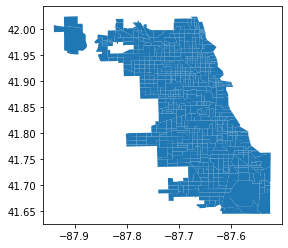

In [4]:
chicago.plot()

# Exposure

In [5]:
ex = pd.read_csv('Exposure_0412.csv', dtype = {"GEOID":str,"GEO_ID":str})
ex.head()

Unnamed: 0  State  Price              AFFGEOID        GEOID         fuel  \
0           0      9  2.229  1400000US09001022000  09001022000  1057.581145   
1           1      9  2.229  1400000US09001042500  09001042500  1175.059270   
2           2      9  2.229  1400000US09001043500  09001043500  1108.900146   
3           3      9  2.229  1400000US09001010700  09001010700   591.341144   
4           4      9  2.229  1400000US09001021500  09001021500   561.379578   

        GEO_ID                                             NAME  HH_num_total  \
0  09001022000  Census Tract 220, Fairfield County, Connecticut          1020   
1  09001042500  Census Tract 425, Fairfield County, Connecticut          1465   
2  09001043500  Census Tract 435, Fairfield County, Connecticut           933   
3  09001010700  Census Tract 107, Fairfield County, Connecticut          1682   
4  09001021500  Census Tract 215, Fairfield County, Connecticut          2094   

   median_income  exposure   min-max  
0        82753.0  0.028487  0.055157  
1       129821.0  0.020176  0.035431  
2       104417.0  0.023672  0.043729  
3        61667.0  0.021374  0.038277  
4        43357.0  0.028861  0.056045

In [6]:
ex = ex[['GEOID','fuel','Price','exposure','min-max']]
chi_ex = pd.merge(ex,chicago,left_on='GEOID',right_on='geoid10',how='right')

In [7]:
chi_ex = gpd.GeoDataFrame(chi_ex,crs = 4326)

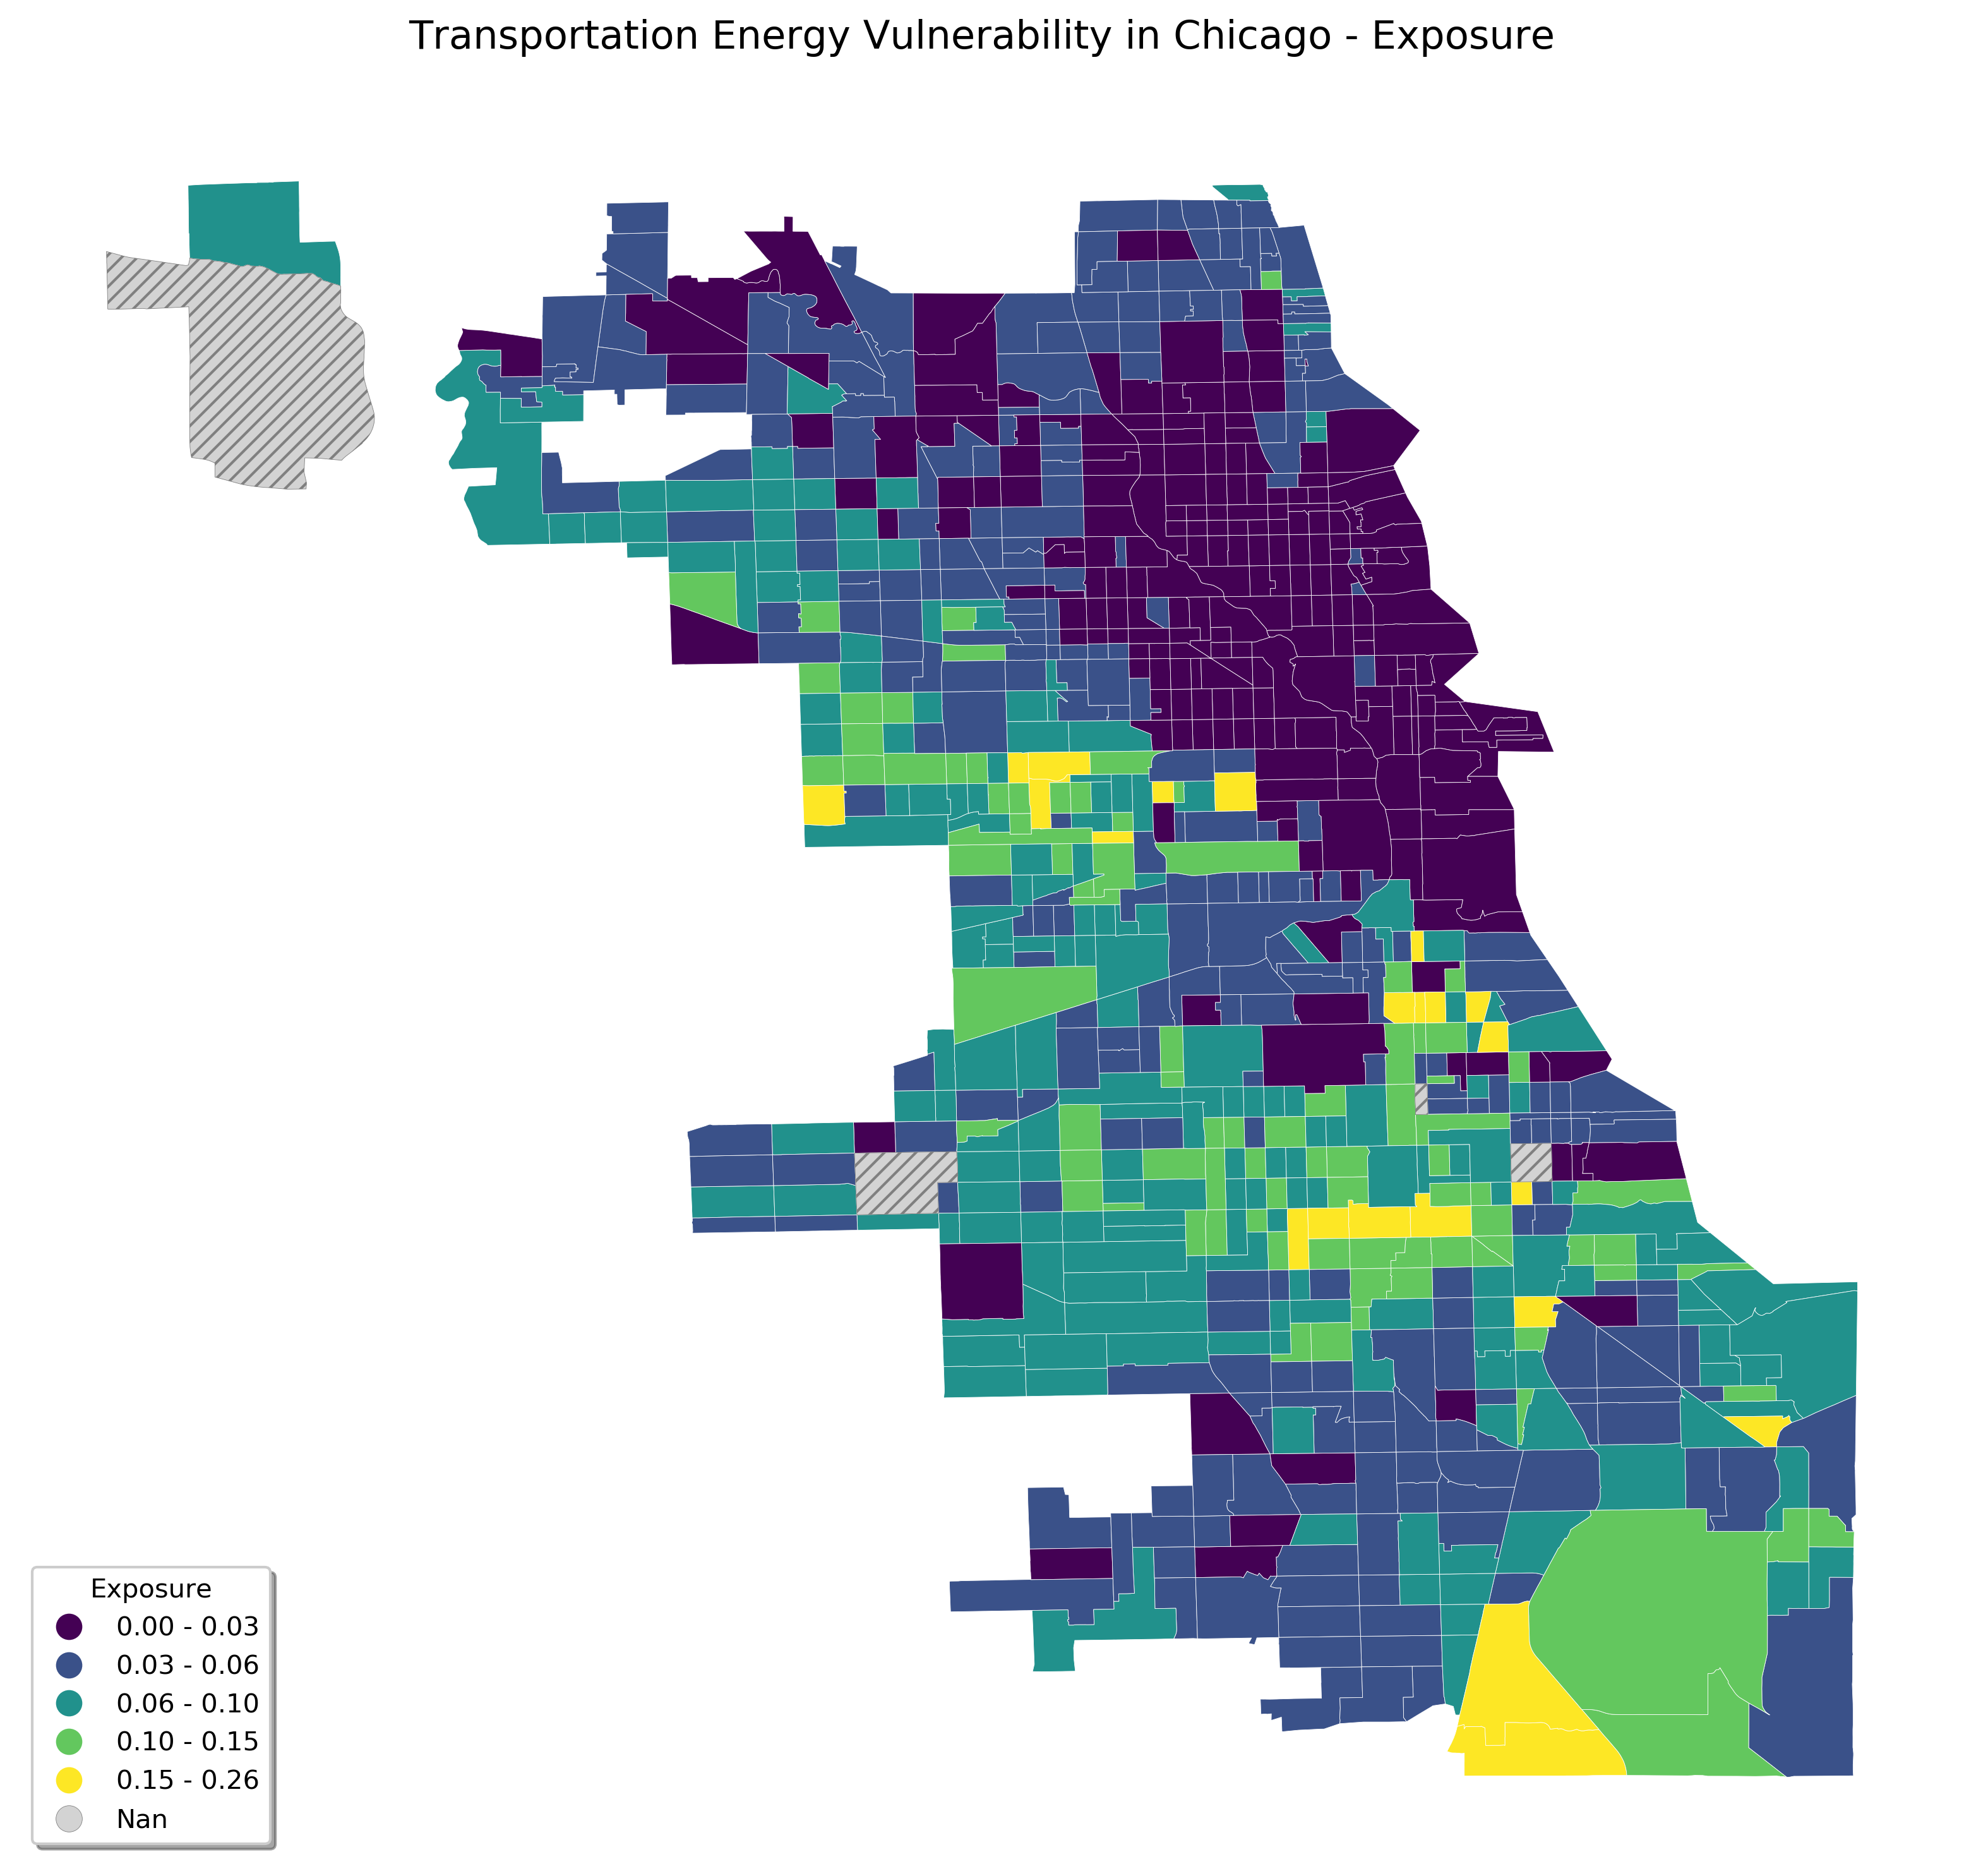

In [8]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

chi_ex.plot(
    column='min-max',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': 'Exposure',
                 'shadow': True
                },
    missing_kwds={
                "color": "lightgrey",
                "edgecolor": "grey",
                "hatch": "////",
                "label": "Nan"
                },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2
)

ax.axis('off')
ax.set_title('Transportation Energy Vulnerability in Chicago - Exposure', fontsize=15,pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
fig.tight_layout()

fig.savefig('Chicago_exposure_map.png', facecolor='w', dpi=500)

# Sensitivity

In [9]:
sensitivity = pd.read_csv("Sensitivity-0409.csv", dtype={"Geocode": str})
sensitivity.head()

Unnamed: 0      Geocode        X1      X2        X3        X4        X5  \
0           0  01001020100  0.166583  0.4378  0.113397  0.009533  0.717010   
1           1  01001020200  0.166922  0.3305  0.582440  0.004594  0.639612   
2           2  01001020300  0.172512  0.2927  0.260051  0.066439  0.706872   
3           3  01001020400  0.046416  0.3711  0.070397  0.000000  0.751160   
4           4  01001020500  0.149207  0.3735  0.192337  0.030294  0.837958   

         X6        X7  Sensitivity  z_score_sens  min_max_sens  
0  0.132464  0.188660     0.252207     -0.345779      0.470402  
1  0.144972  0.196018     0.295008      0.444644      0.550234  
2  0.160251  0.201882     0.265815     -0.094468      0.495784  
3  0.244714  0.167870     0.235951     -0.645974      0.440083  
4  0.138071  0.198282     0.274236      0.061032      0.511489

In [11]:
chi_sens = pd.merge(chicago,sensitivity,left_on='geoid10',right_on="Geocode",how="left")
chi_sens.head()

commarea  commarea_n countyfp10      geoid10 name10         namelsad10  \
0       44        44.0        031  17031842400   8424  Census Tract 8424   
1       59        59.0        031  17031840300   8403  Census Tract 8403   
2       34        34.0        031  17031841100   8411  Census Tract 8411   
3       31        31.0        031  17031841200   8412  Census Tract 8412   
4       32        32.0        031  17031839000   8390  Census Tract 8390   

  notes statefp10 tractce10  \
0  None        17    842400   
1  None        17    840300   
2  None        17    841100   
3  None        17    841200   
4  None        17    839000   

                                            geometry  ...        X1      X2  \
0  POLYGON ((-87.62405 41.73022, -87.62405 41.730...  ...  0.231992  0.2337   
1  POLYGON ((-87.68608 41.82296, -87.68607 41.823...  ...  0.191968  0.3429   
2  POLYGON ((-87.62935 41.85280, -87.62934 41.852...  ...  0.301036  0.3842   
3  POLYGON ((-87.68813 41.85569, -87.68816 41.856...  ...  0.174444  0.4011   
4  POLYGON ((-87.63312 41.87449, -87.63306 41.874...  ...  0.178195  0.3258   

         X3        X4        X5        X6        X7  Sensitivity  \
0  0.970798  0.005516  0.835496  0.162232  0.213173     0.378987   
1  0.031615  0.547707  0.720308  0.096554  0.186272     0.302475   
2  0.014282  0.013162  0.809437  0.232988  0.120694     0.267971   
3  0.058657  0.635412  0.873746  0.049062  0.226559     0.345569   
4  0.135737  0.041698  0.952438  0.084483  0.070149     0.255500   

   z_score_sens  min_max_sens  
0      1.995484      0.706866  
1      0.582527      0.564160  
2     -0.054652      0.499806  
3      1.378346      0.644536  
4     -0.284962      0.476545  

[5 rows x 22 columns]

/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


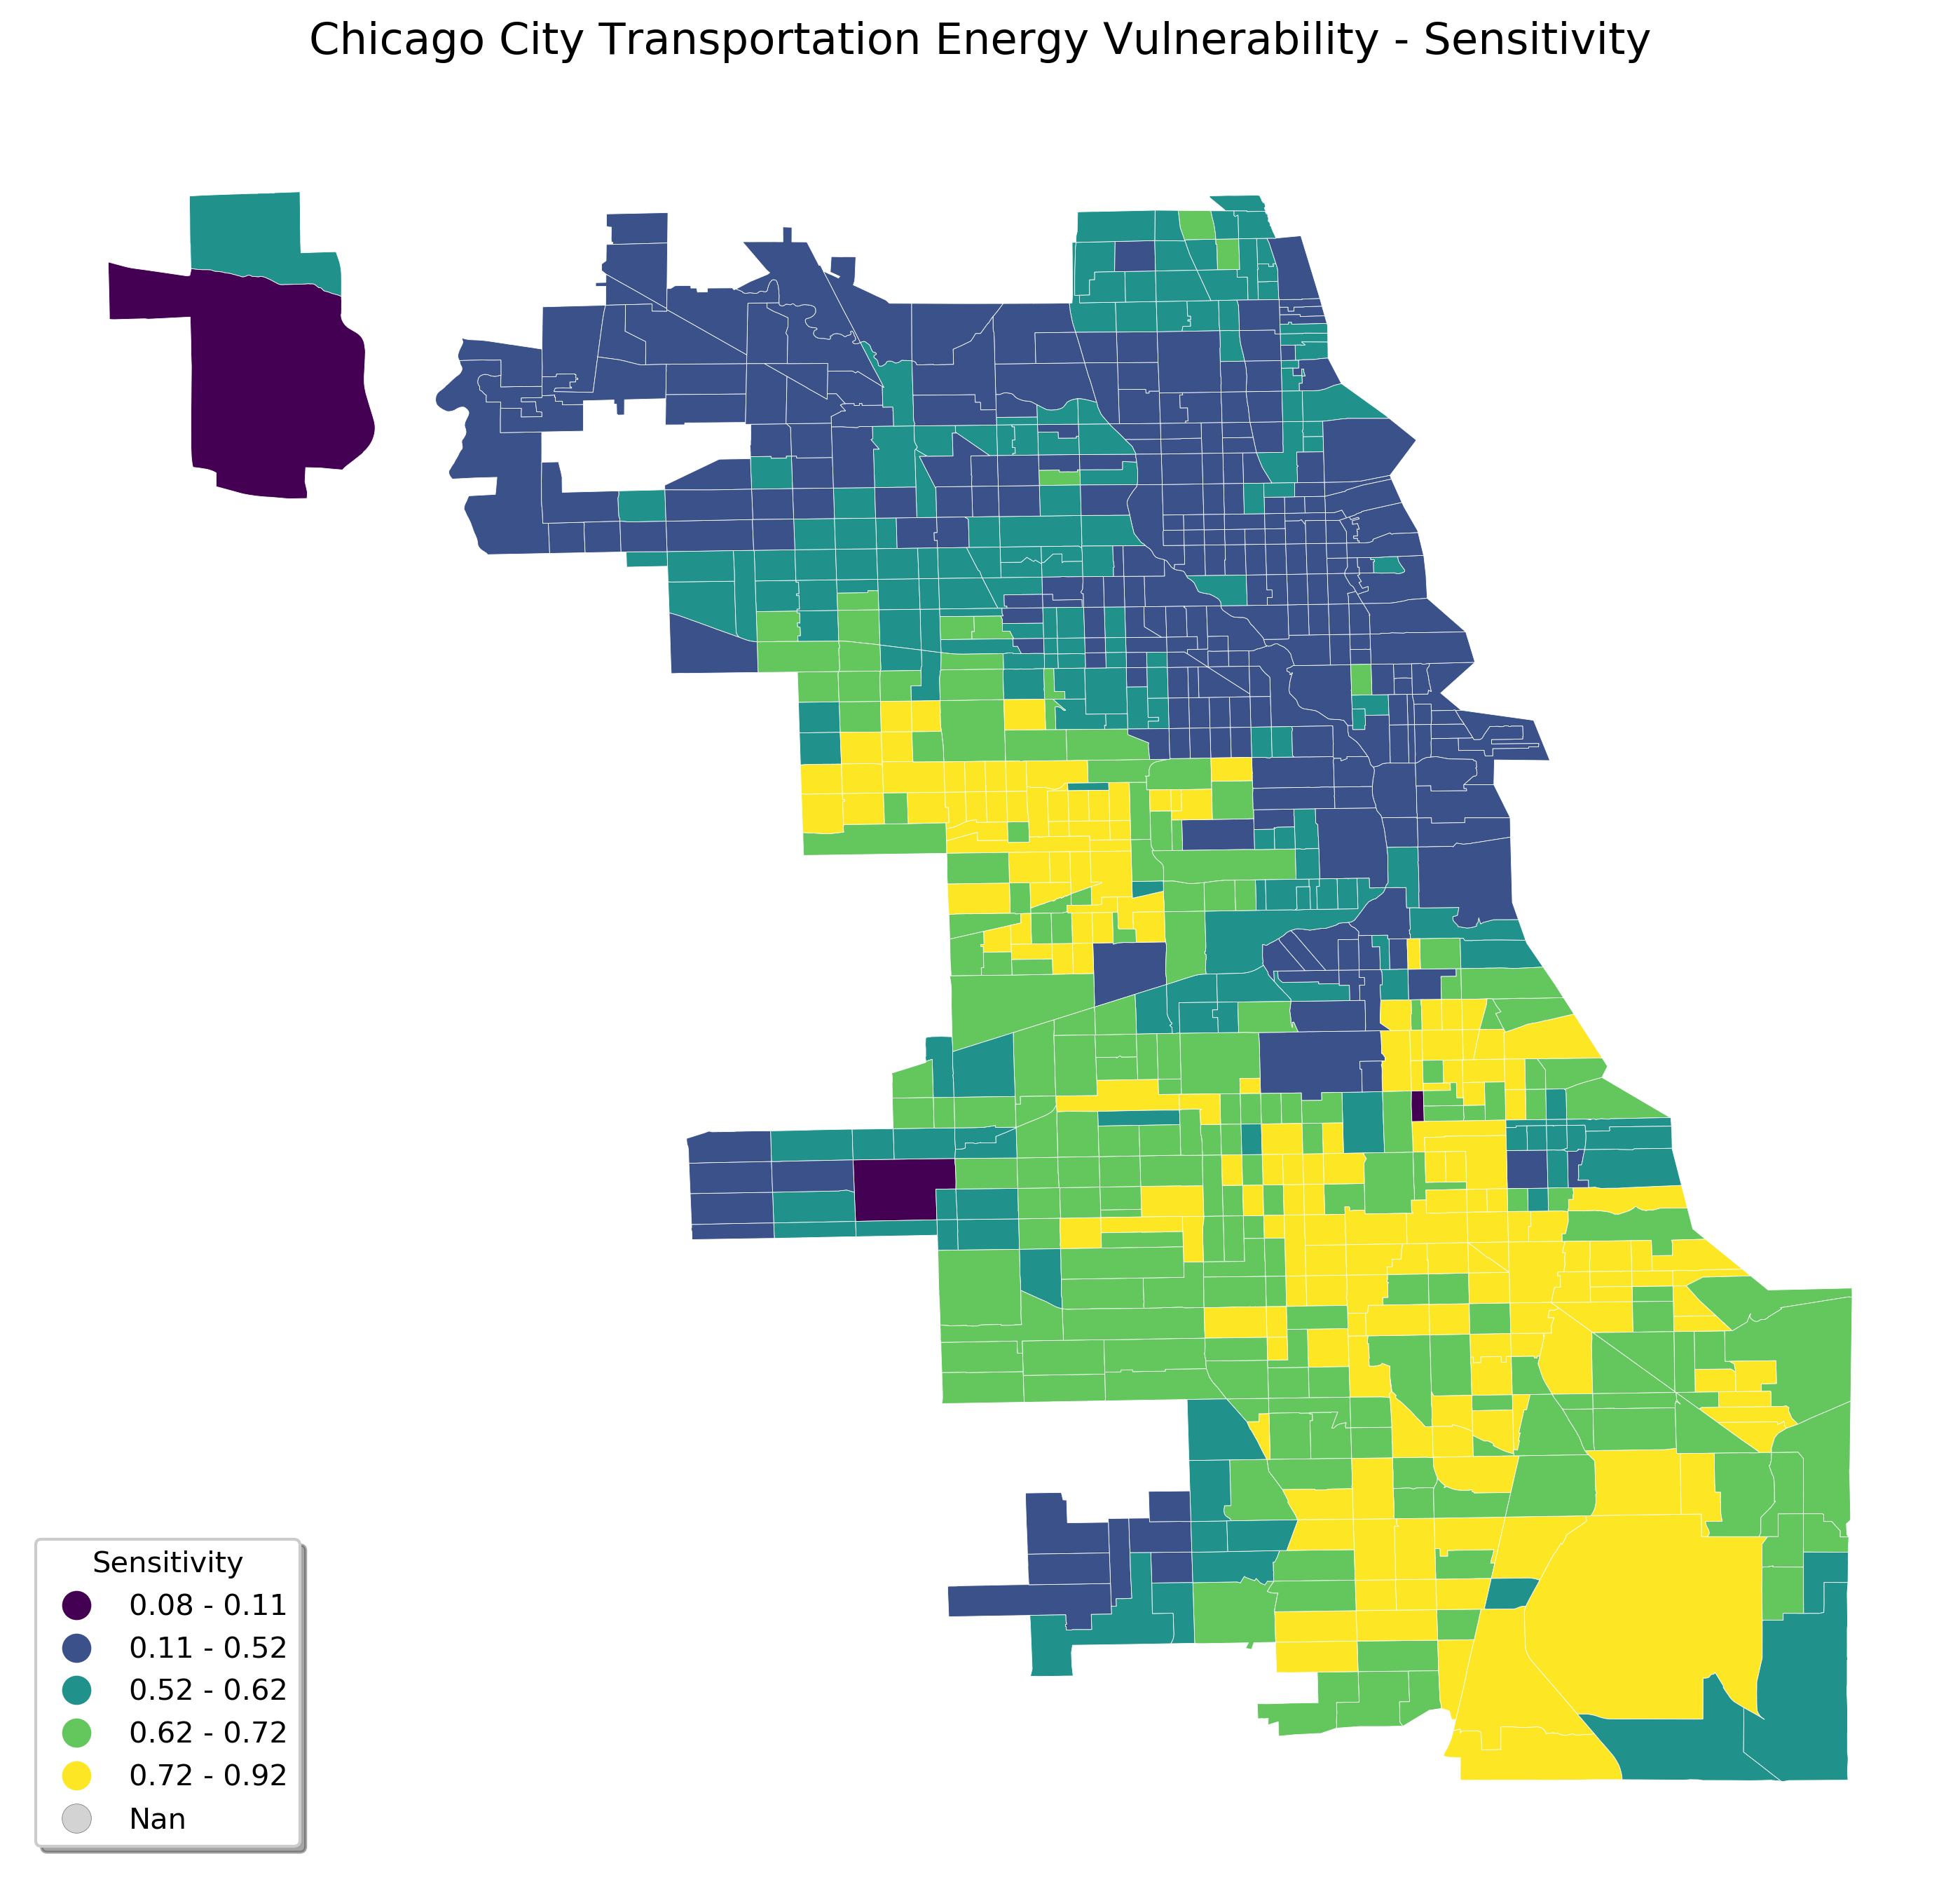

In [14]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

chi_sens.plot(
    column='min_max_sens',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': 'Sensitivity',
                 'shadow': True
                },
    missing_kwds={
                 "color": "lightgrey",
                 "edgecolor": "grey",
                 "hatch": "////",
                 "label": "Nan"
                 },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2
)

ax.axis('off')
ax.set_title('Chicago City Transportation Energy Vulnerability - Sensitivity', fontsize=15,pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('Chi_sensitivity_map.png', facecolor='w', dpi=500)

# Adaptive Capacity

In [15]:
AC_tract_US = pd.read_csv("all_ac_data_0516.csv",dtype={"GEO_ID":str})
AC_tract_US.head()

Unnamed: 0       GEO_ID  Weighted_D5be  Weighted_D4c  Weighted_D4a  \
0           0  01001020100            NaN           NaN           NaN   
1           1  01001020200            NaN           NaN           NaN   
2           2  01001020300            NaN           NaN           NaN   
3           3  01001020400            NaN           NaN           NaN   
4           4  01001020500            NaN           NaN           NaN   

   D5be_score  D4c_score  D4a_score  ac  AC_score  
0         NaN        NaN        NaN NaN       NaN  
1         NaN        NaN        NaN NaN       NaN  
2         NaN        NaN        NaN NaN       NaN  
3         NaN        NaN        NaN NaN       NaN  
4         NaN        NaN        NaN NaN       NaN

In [16]:
AC_tract_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74102 entries, 0 to 74101
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     74102 non-null  int64  
 1   GEO_ID         74102 non-null  object 
 2   Weighted_D5be  25521 non-null  float64
 3   Weighted_D4c   28063 non-null  float64
 4   Weighted_D4a   26565 non-null  float64
 5   D5be_score     25521 non-null  float64
 6   D4c_score      28063 non-null  float64
 7   D4a_score      26565 non-null  float64
 8   ac             25232 non-null  float64
 9   AC_score       25231 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.7+ MB


In [17]:
AC_tract_chicago = pd.merge(chicago,AC_tract_US,left_on="geoid10",right_on="GEO_ID",how="left")

In [19]:
AC_tract_chicago.head()

commarea  commarea_n countyfp10      geoid10 name10         namelsad10  \
0       44        44.0        031  17031842400   8424  Census Tract 8424   
1       59        59.0        031  17031840300   8403  Census Tract 8403   
2       34        34.0        031  17031841100   8411  Census Tract 8411   
3       31        31.0        031  17031841200   8412  Census Tract 8412   
4       32        32.0        031  17031839000   8390  Census Tract 8390   

  notes statefp10 tractce10  \
0  None        17    842400   
1  None        17    840300   
2  None        17    841100   
3  None        17    841200   
4  None        17    839000   

                                            geometry  Unnamed: 0       GEO_ID  \
0  POLYGON ((-87.62405 41.73022, -87.62405 41.730...       22399  17031842400   
1  POLYGON ((-87.68608 41.82296, -87.68607 41.823...       22381  17031840300   
2  POLYGON ((-87.62935 41.85280, -87.62934 41.852...       22386  17031841100   
3  POLYGON ((-87.68813 41.85569, -87.68816 41.856...       22387  17031841200   
4  POLYGON ((-87.63312 41.87449, -87.63306 41.874...       22370  17031839000   

   Weighted_D5be  Weighted_D4c  Weighted_D4a  D5be_score  D4c_score  \
0   21778.780711    347.166465    324.438979    0.027790   0.078890   
1   25538.322992    231.473586    264.089804    0.032587   0.052600   
2   24367.829442    200.014980    320.723399    0.031094   0.045451   
3   27205.527134    193.700494    197.478104    0.034714   0.044016   
4   41840.006306    412.479734    182.508506    0.053388   0.093731   

   D4a_score        ac  AC_score  
0   0.269088 -0.054136  0.407631  
1   0.219035 -0.044616  0.421611  
2   0.266006 -0.063154  0.394389  
3   0.163787 -0.028352  0.445493  
4   0.151372 -0.001417  0.485045

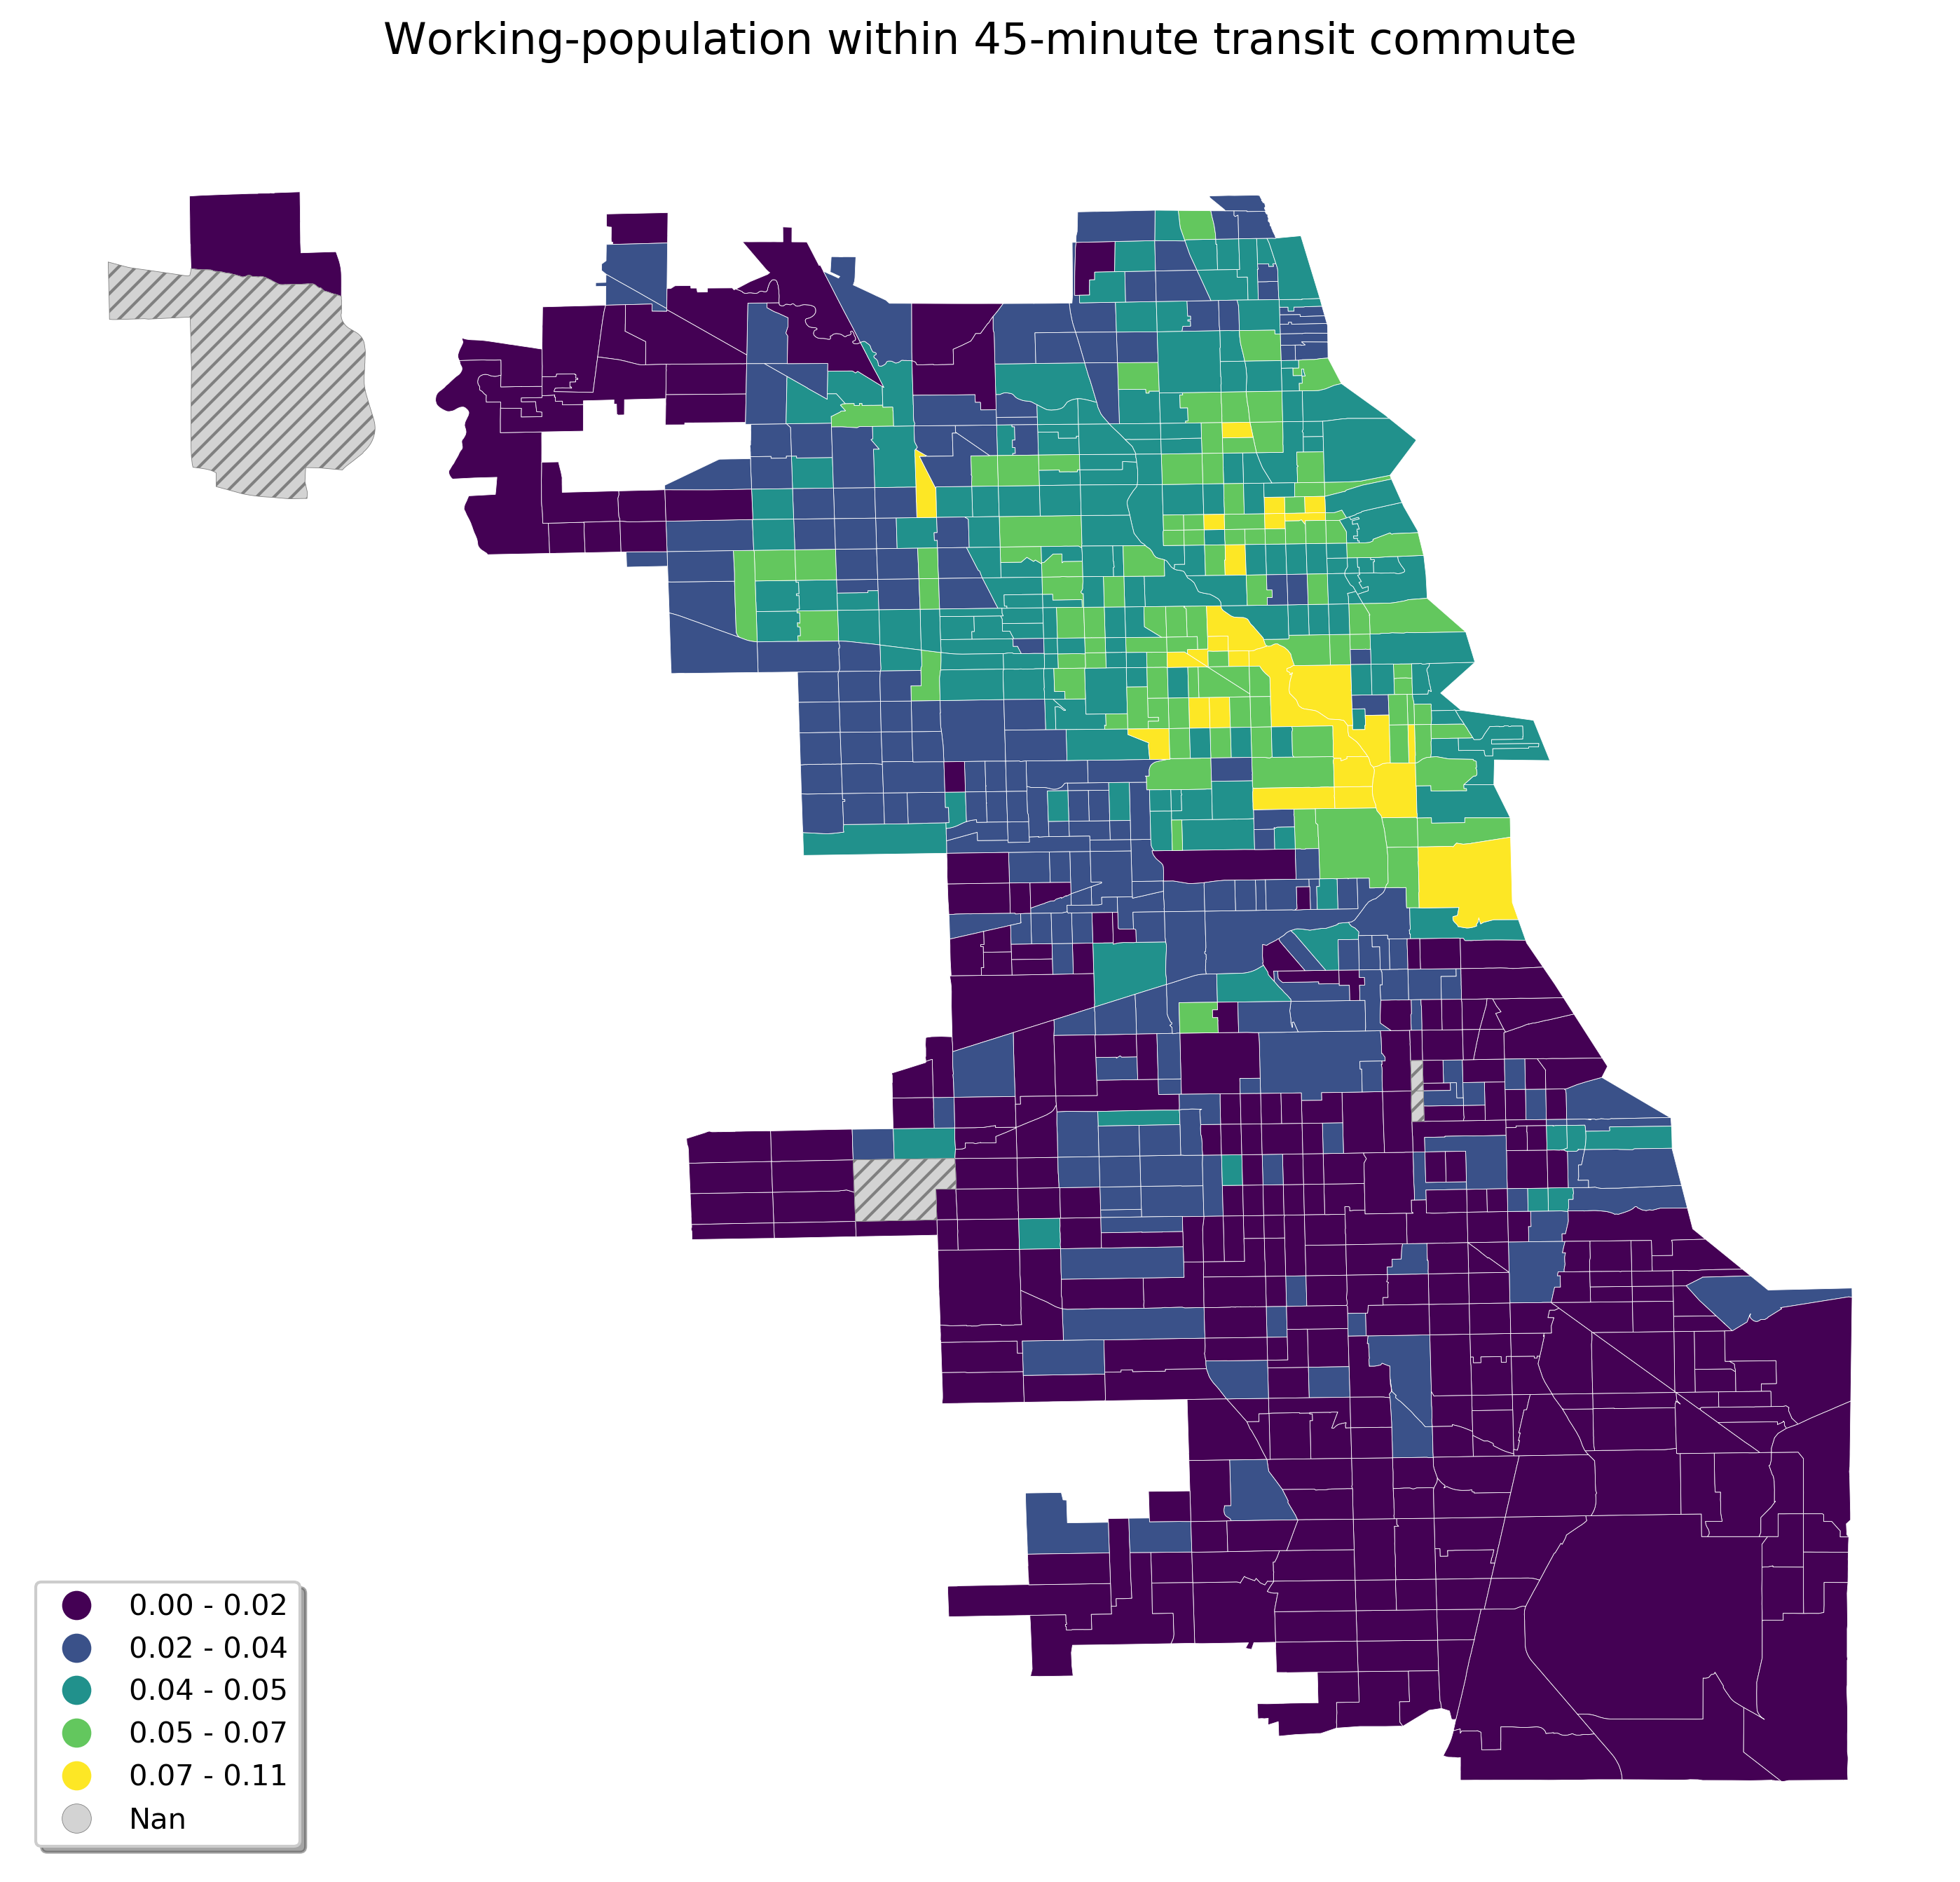

In [23]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

AC_tract_chicago.plot(
    column='D5be_score',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': '',
                 'shadow': True
                },
    missing_kwds={
                "color": "lightgrey",
                "edgecolor": "grey",
                "hatch": "////",
                "label": "Nan"
                },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2
)

ax.axis('off')
ax.set_title('Working-population within 45-minute transit commute', fontsize=15,pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('D5be_normal_map.png', facecolor='w', dpi=500)

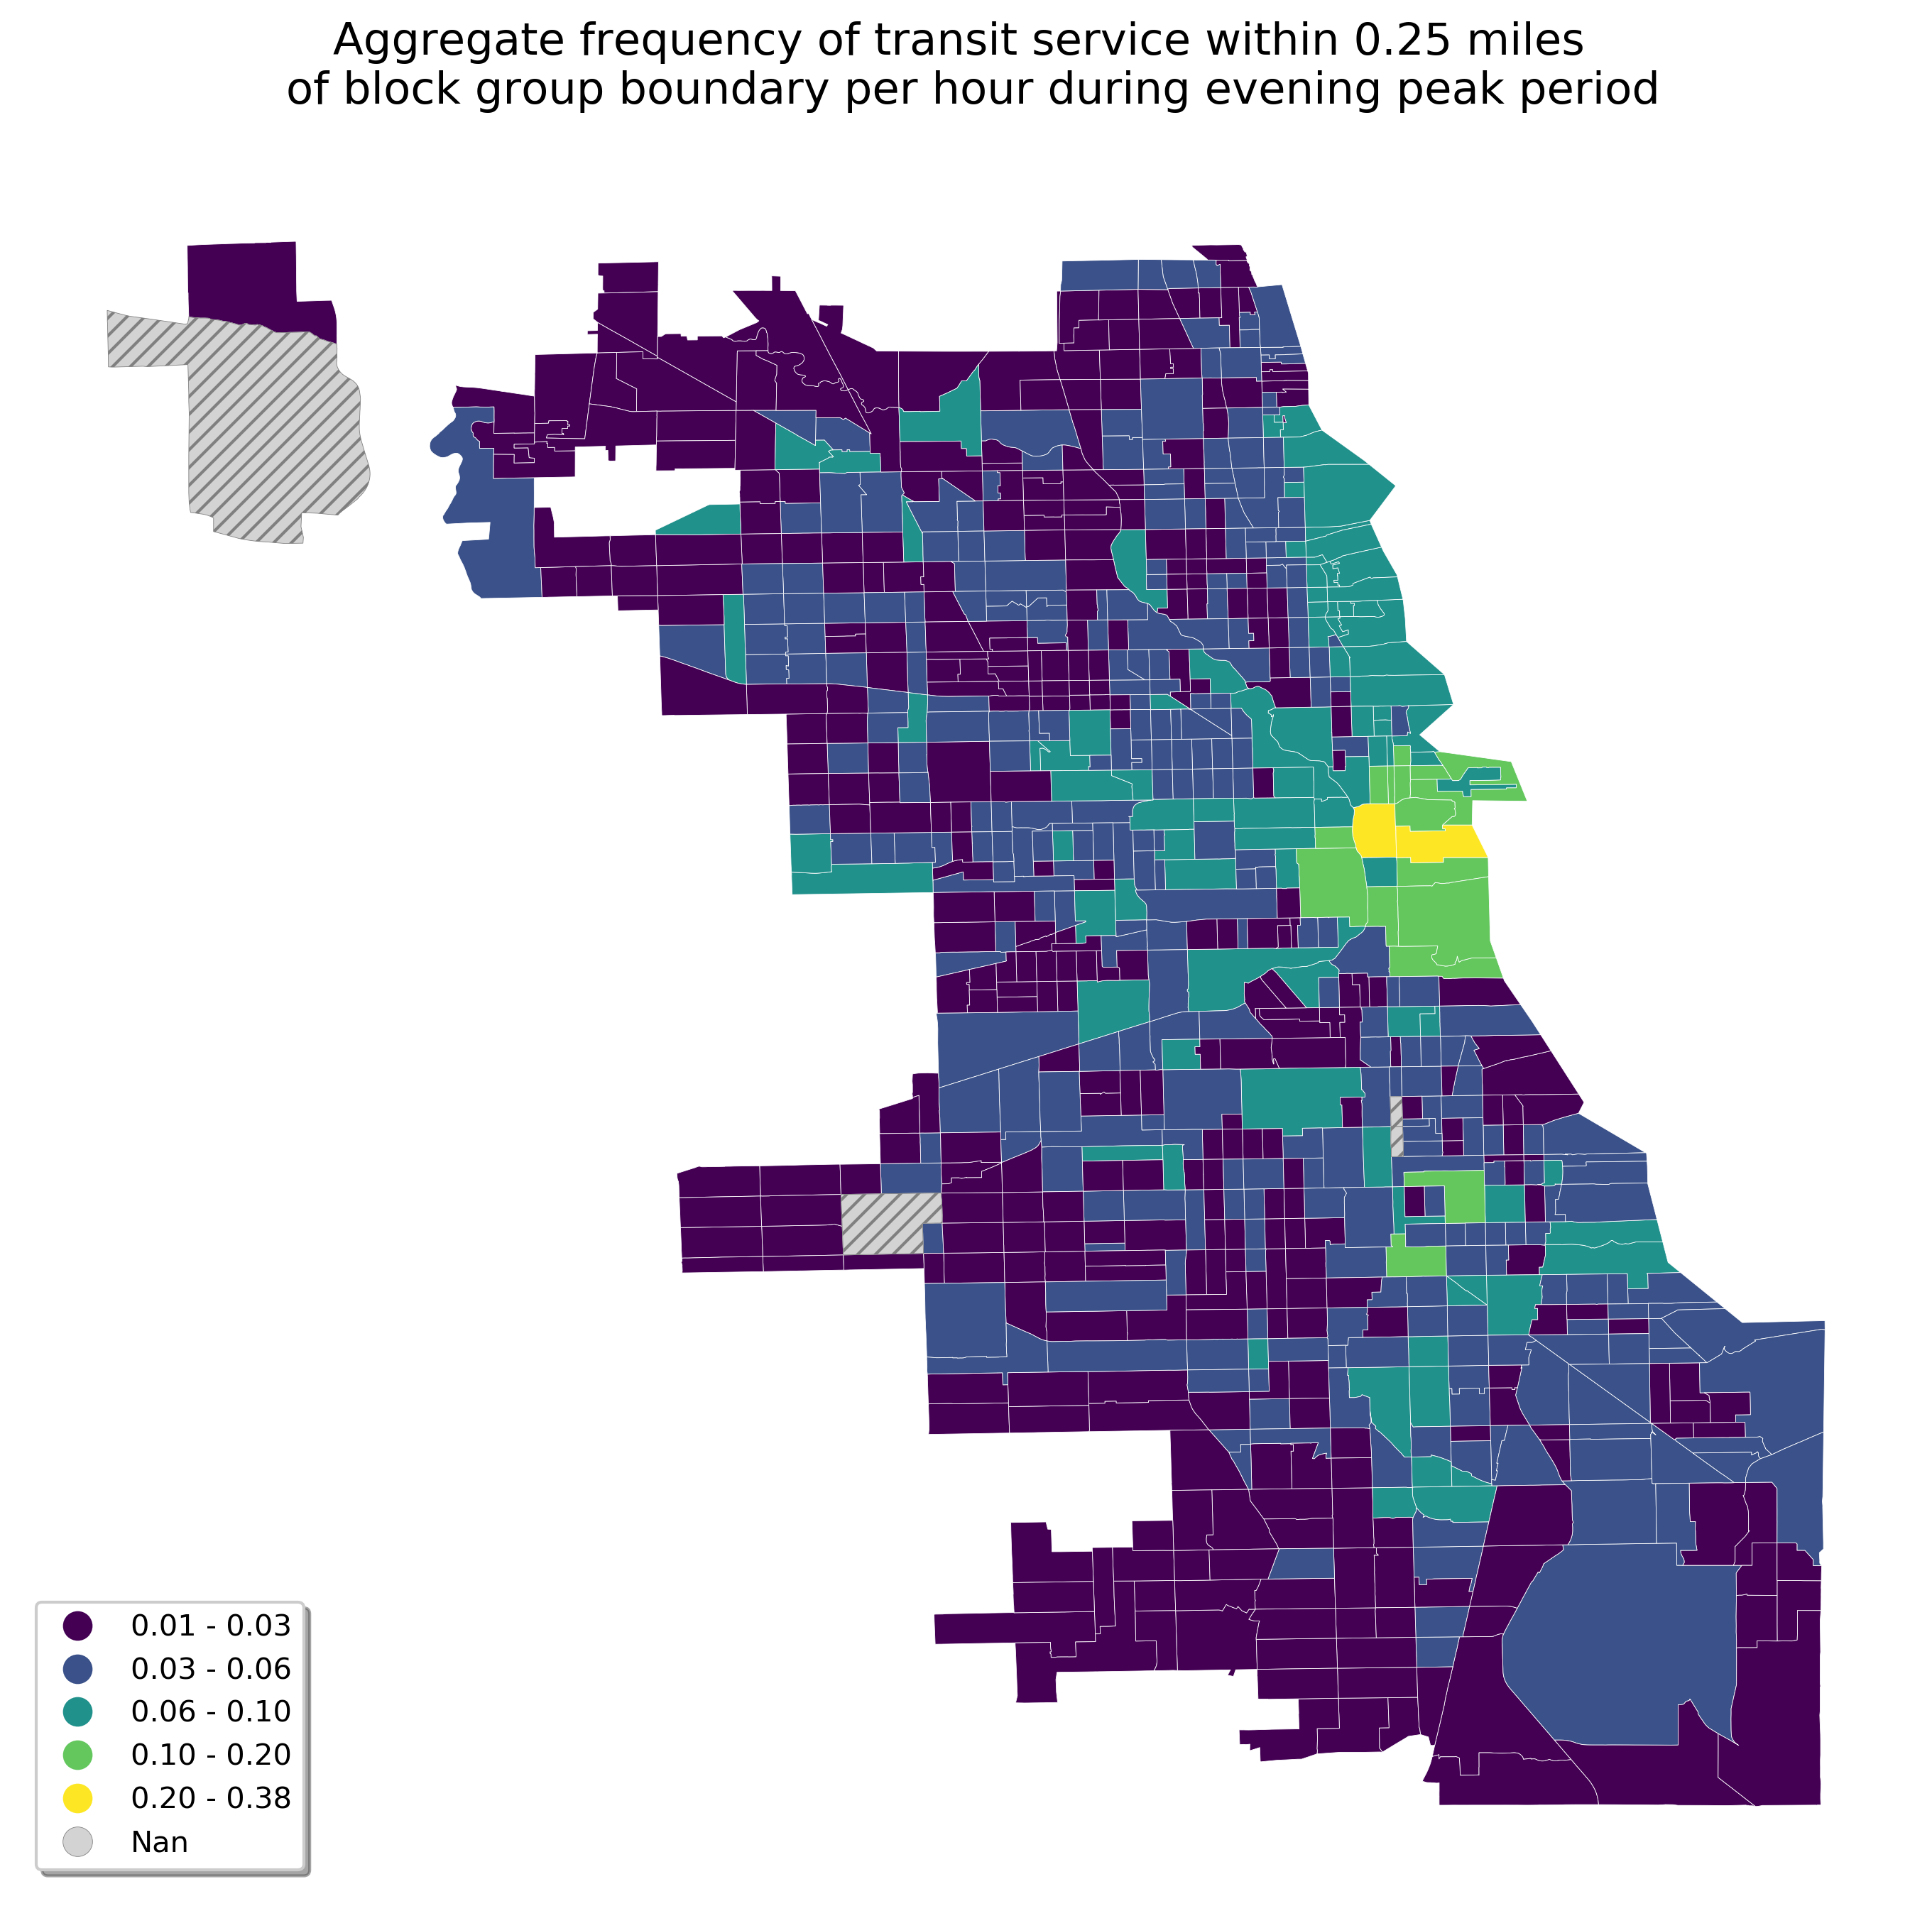

In [24]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

AC_tract_chicago.plot(
    column='D4c_score',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': '',
                 'shadow': True
                },
    missing_kwds={
                "color": "lightgrey",
                "edgecolor": "grey",
                "hatch": "////",
                "label": "Nan"
                },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2
)

ax.axis('off')
ax.set_title("Aggregate frequency of transit service within 0.25 miles \n of block group boundary per hour during evening peak period", 
             fontsize=15,pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('D4c_normal_map.png', facecolor='w', dpi=500)

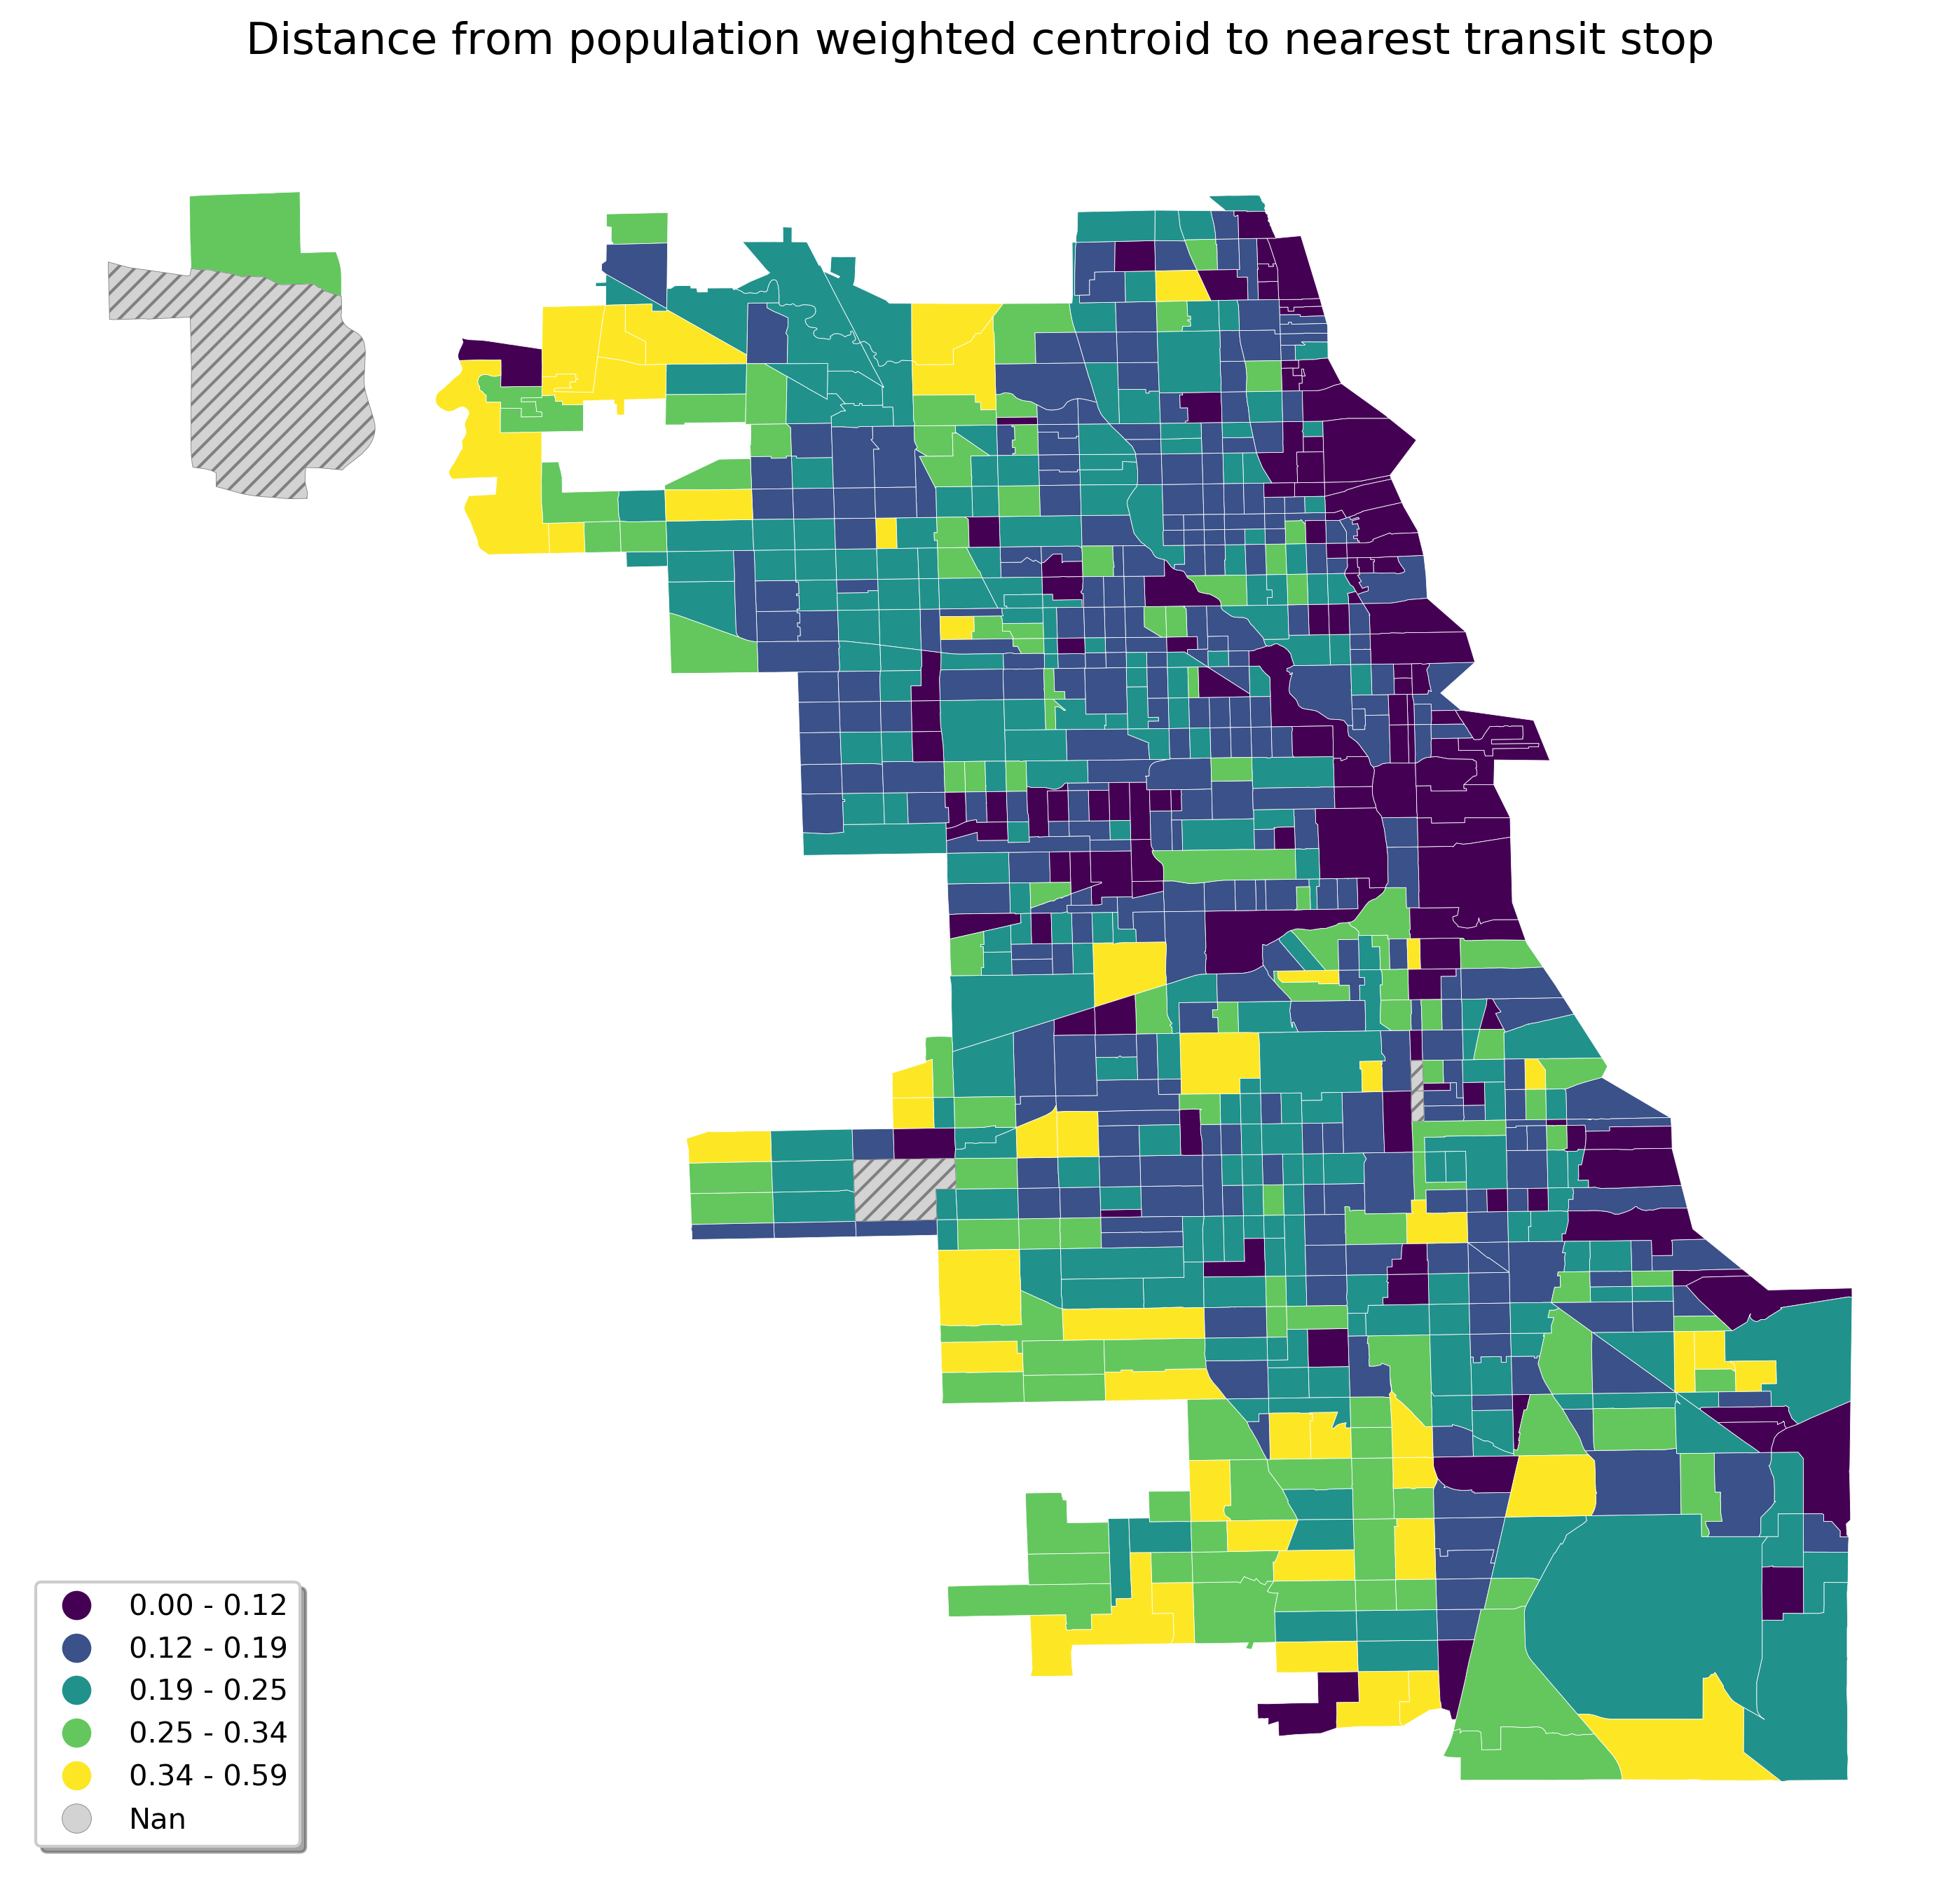

In [25]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

AC_tract_chicago.plot(
    column='D4a_score',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': '',
                 'shadow': True
                },
    missing_kwds={
                  "color": "lightgrey",
                  "edgecolor": "grey",
                  "hatch": "////",
                  "label": "Nan"
                  },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2
)

ax.axis('off')
ax.set_title('Distance from population weighted centroid to nearest transit stop', 
             fontsize=15,pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('D4a_normal_map.png', facecolor='w', dpi=500)

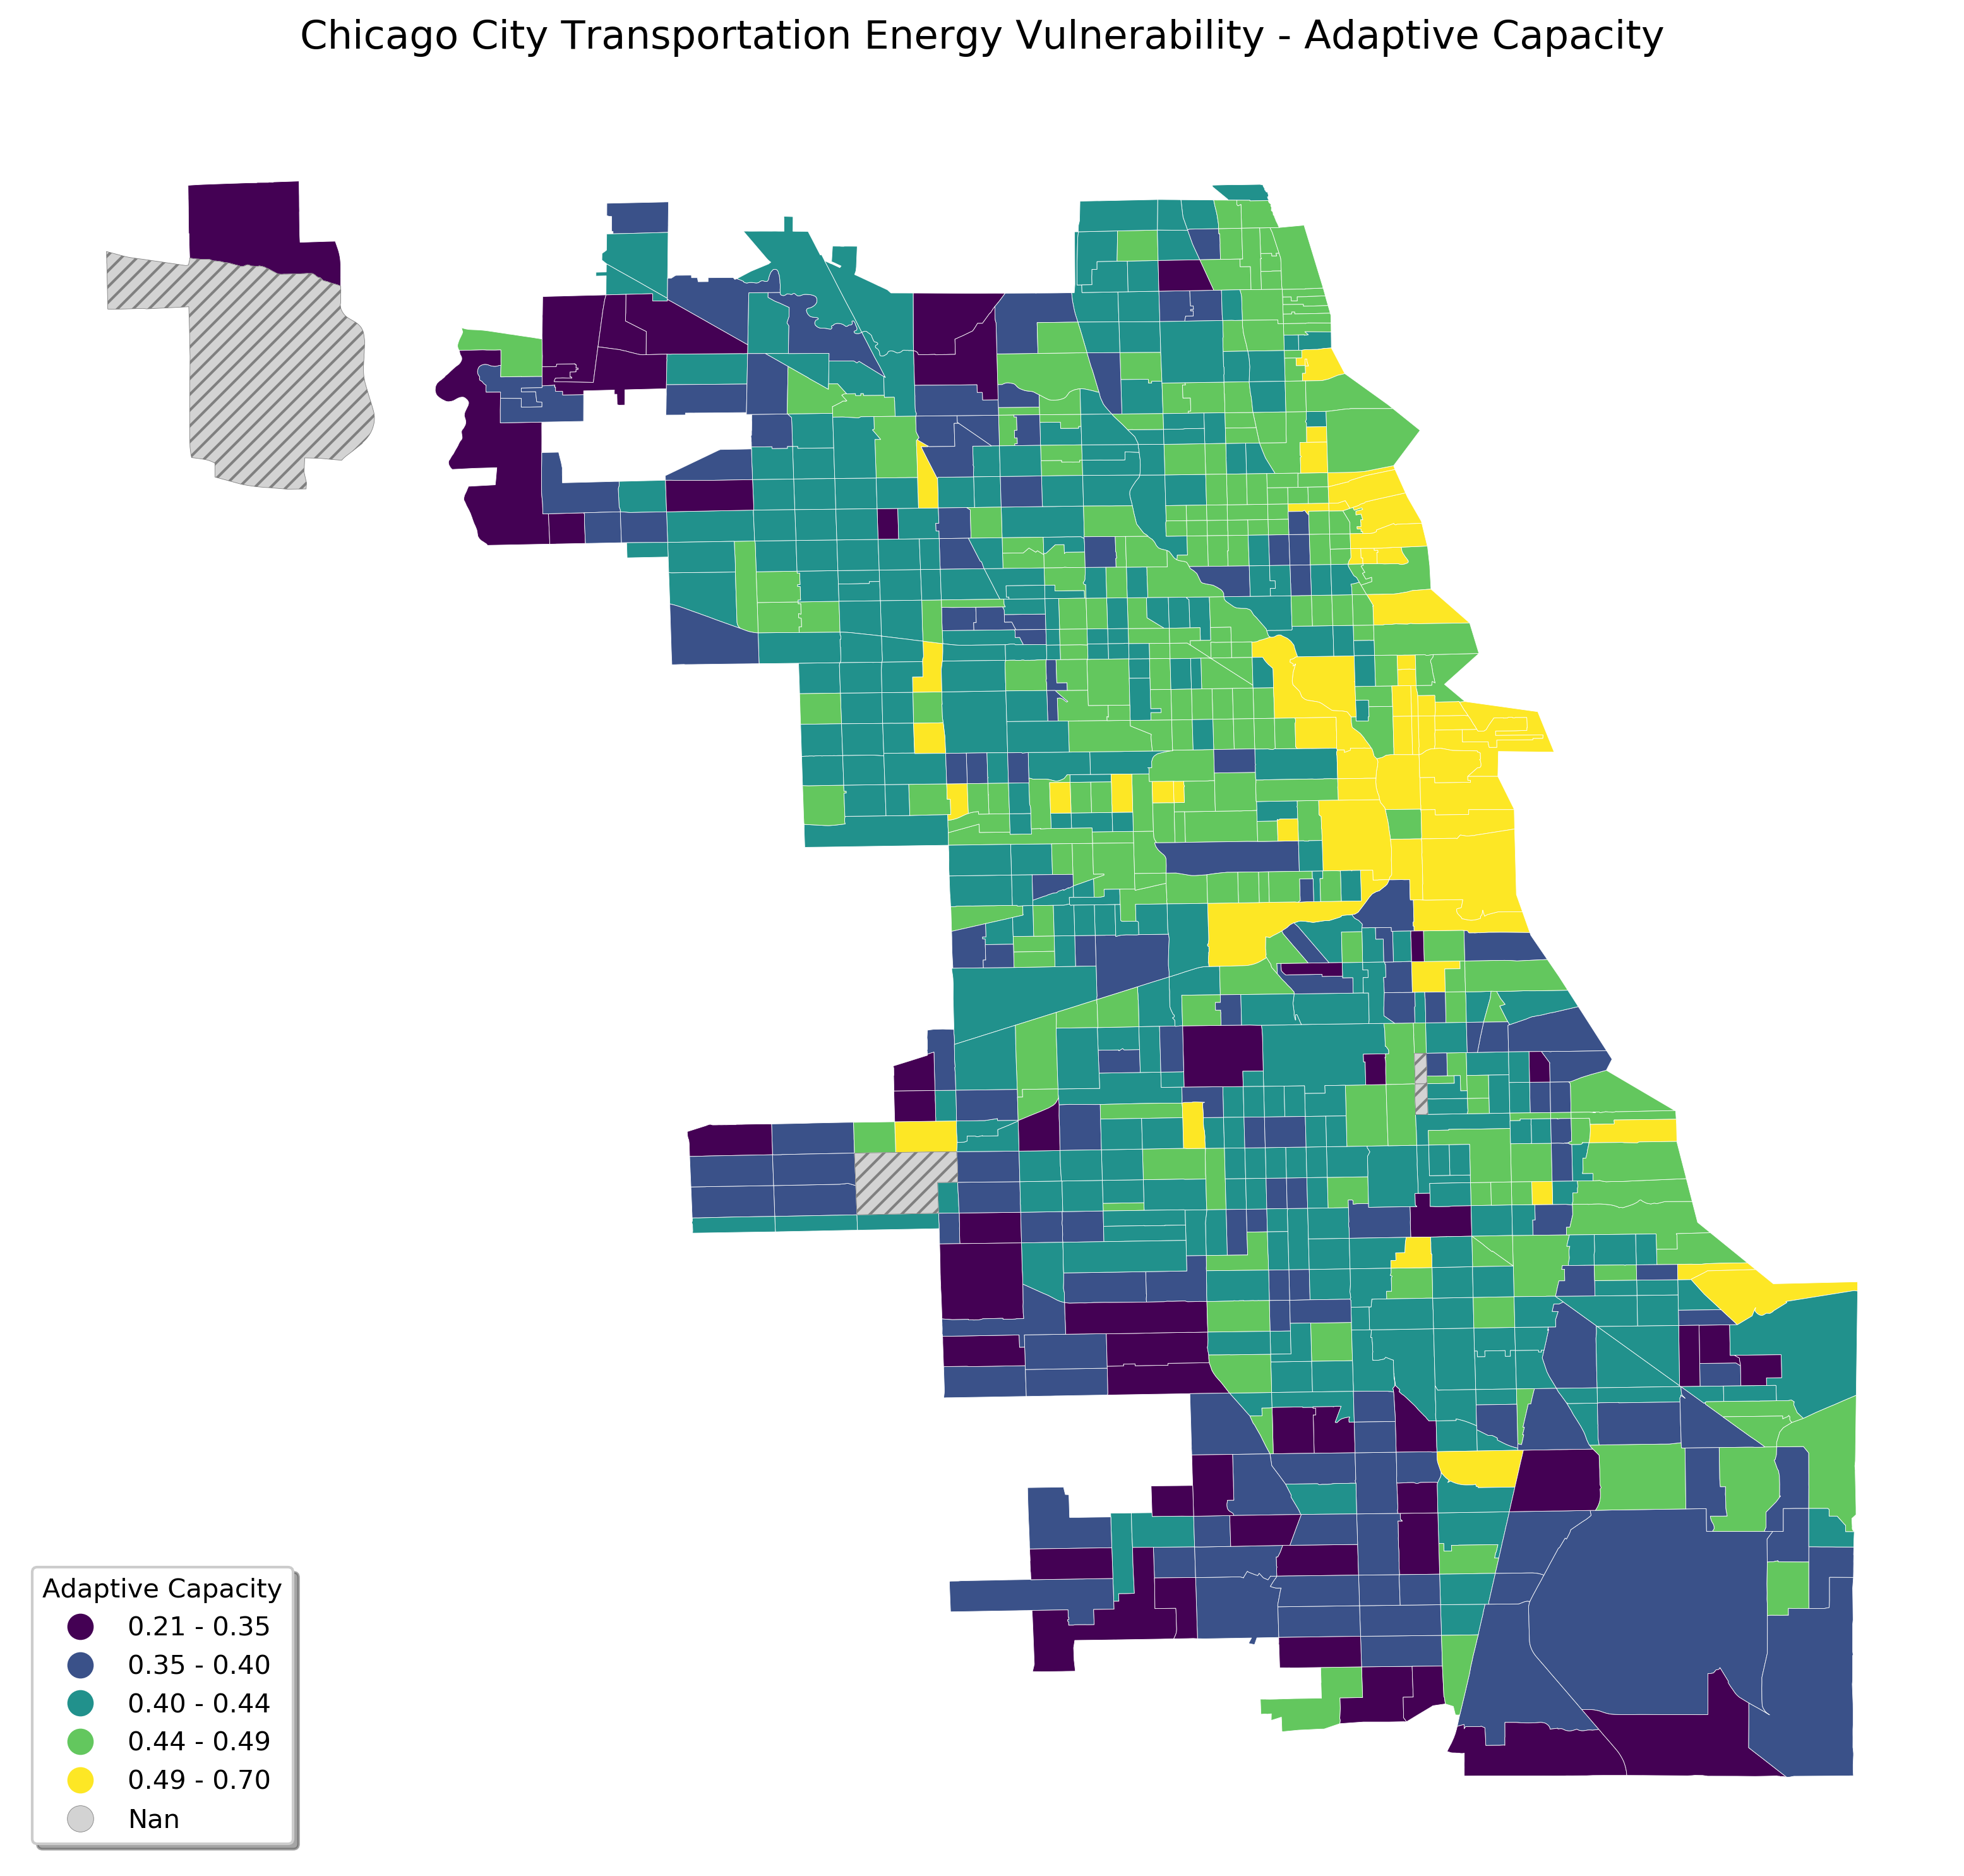

In [26]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

AC_tract_chicago.plot(
    column='AC_score',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': 'Adaptive Capacity',
                 'shadow': True
                },
    missing_kwds={
                "color": "lightgrey",
                "edgecolor": "grey",
                "hatch": "////",
                "label": "Nan"
                },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2
)

ax.axis('off')
ax.set_title('Chicago City Transportation Energy Vulnerability - Adaptive Capacity', 
             fontsize=15,pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
fig.tight_layout()

fig.savefig('Chicago_AC_map.png', facecolor='w', dpi=500)

# Vulnerability Score

In [28]:
vc = pd.read_csv('Vulnerability Score.csv',dtype={'GEOID':str})
vc.head()

Unnamed: 0        GEOID   min-max  min_max_sens  AC_score  \
0           0  09001022000  0.055157      0.441544  0.000000   
1           1  09001042500  0.035431      0.488308  0.000000   
2           2  09001043500  0.043729      0.462731  0.197805   
3           3  09001010700  0.038277      0.501544  0.251396   
4           4  09001021500  0.056045      0.613078  0.184218   

   vulnerablity_score_1  vulnerablity_score_2  
0              0.024354              0.496701  
1              0.017301              0.523739  
2              0.011585              0.308655  
3              0.009575              0.288424  
4              0.024035              0.484905

In [31]:
chi_vc = pd.merge(chicago,vc,left_on='geoid10',right_on="GEOID",how="left")
chi_vc.head()

commarea  commarea_n countyfp10      geoid10 name10         namelsad10  \
0       44        44.0        031  17031842400   8424  Census Tract 8424   
1       59        59.0        031  17031840300   8403  Census Tract 8403   
2       34        34.0        031  17031841100   8411  Census Tract 8411   
3       31        31.0        031  17031841200   8412  Census Tract 8412   
4       32        32.0        031  17031839000   8390  Census Tract 8390   

  notes statefp10 tractce10  \
0  None        17    842400   
1  None        17    840300   
2  None        17    841100   
3  None        17    841200   
4  None        17    839000   

                                            geometry  Unnamed: 0        GEOID  \
0  POLYGON ((-87.62405 41.73022, -87.62405 41.730...       29565  17031842400   
1  POLYGON ((-87.68608 41.82296, -87.68607 41.823...       29525  17031840300   
2  POLYGON ((-87.62935 41.85280, -87.62934 41.852...       29527  17031841100   
3  POLYGON ((-87.68813 41.85569, -87.68816 41.856...       27556  17031841200   
4  POLYGON ((-87.63312 41.87449, -87.63306 41.874...       29522  17031839000   

    min-max  min_max_sens  AC_score  vulnerablity_score_1  \
0  0.048249      0.706866  0.407631              0.014438   
1  0.039394      0.564160  0.421611              0.005616   
2  0.067778      0.499806  0.394389              0.007145   
3  0.050262      0.644536  0.445493              0.010004   
4  0.012753      0.476545  0.485045             -0.000108   

   vulnerablity_score_2  
0              0.347484  
1              0.181943  
2              0.173195  
3              0.249305  
4              0.004253

/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


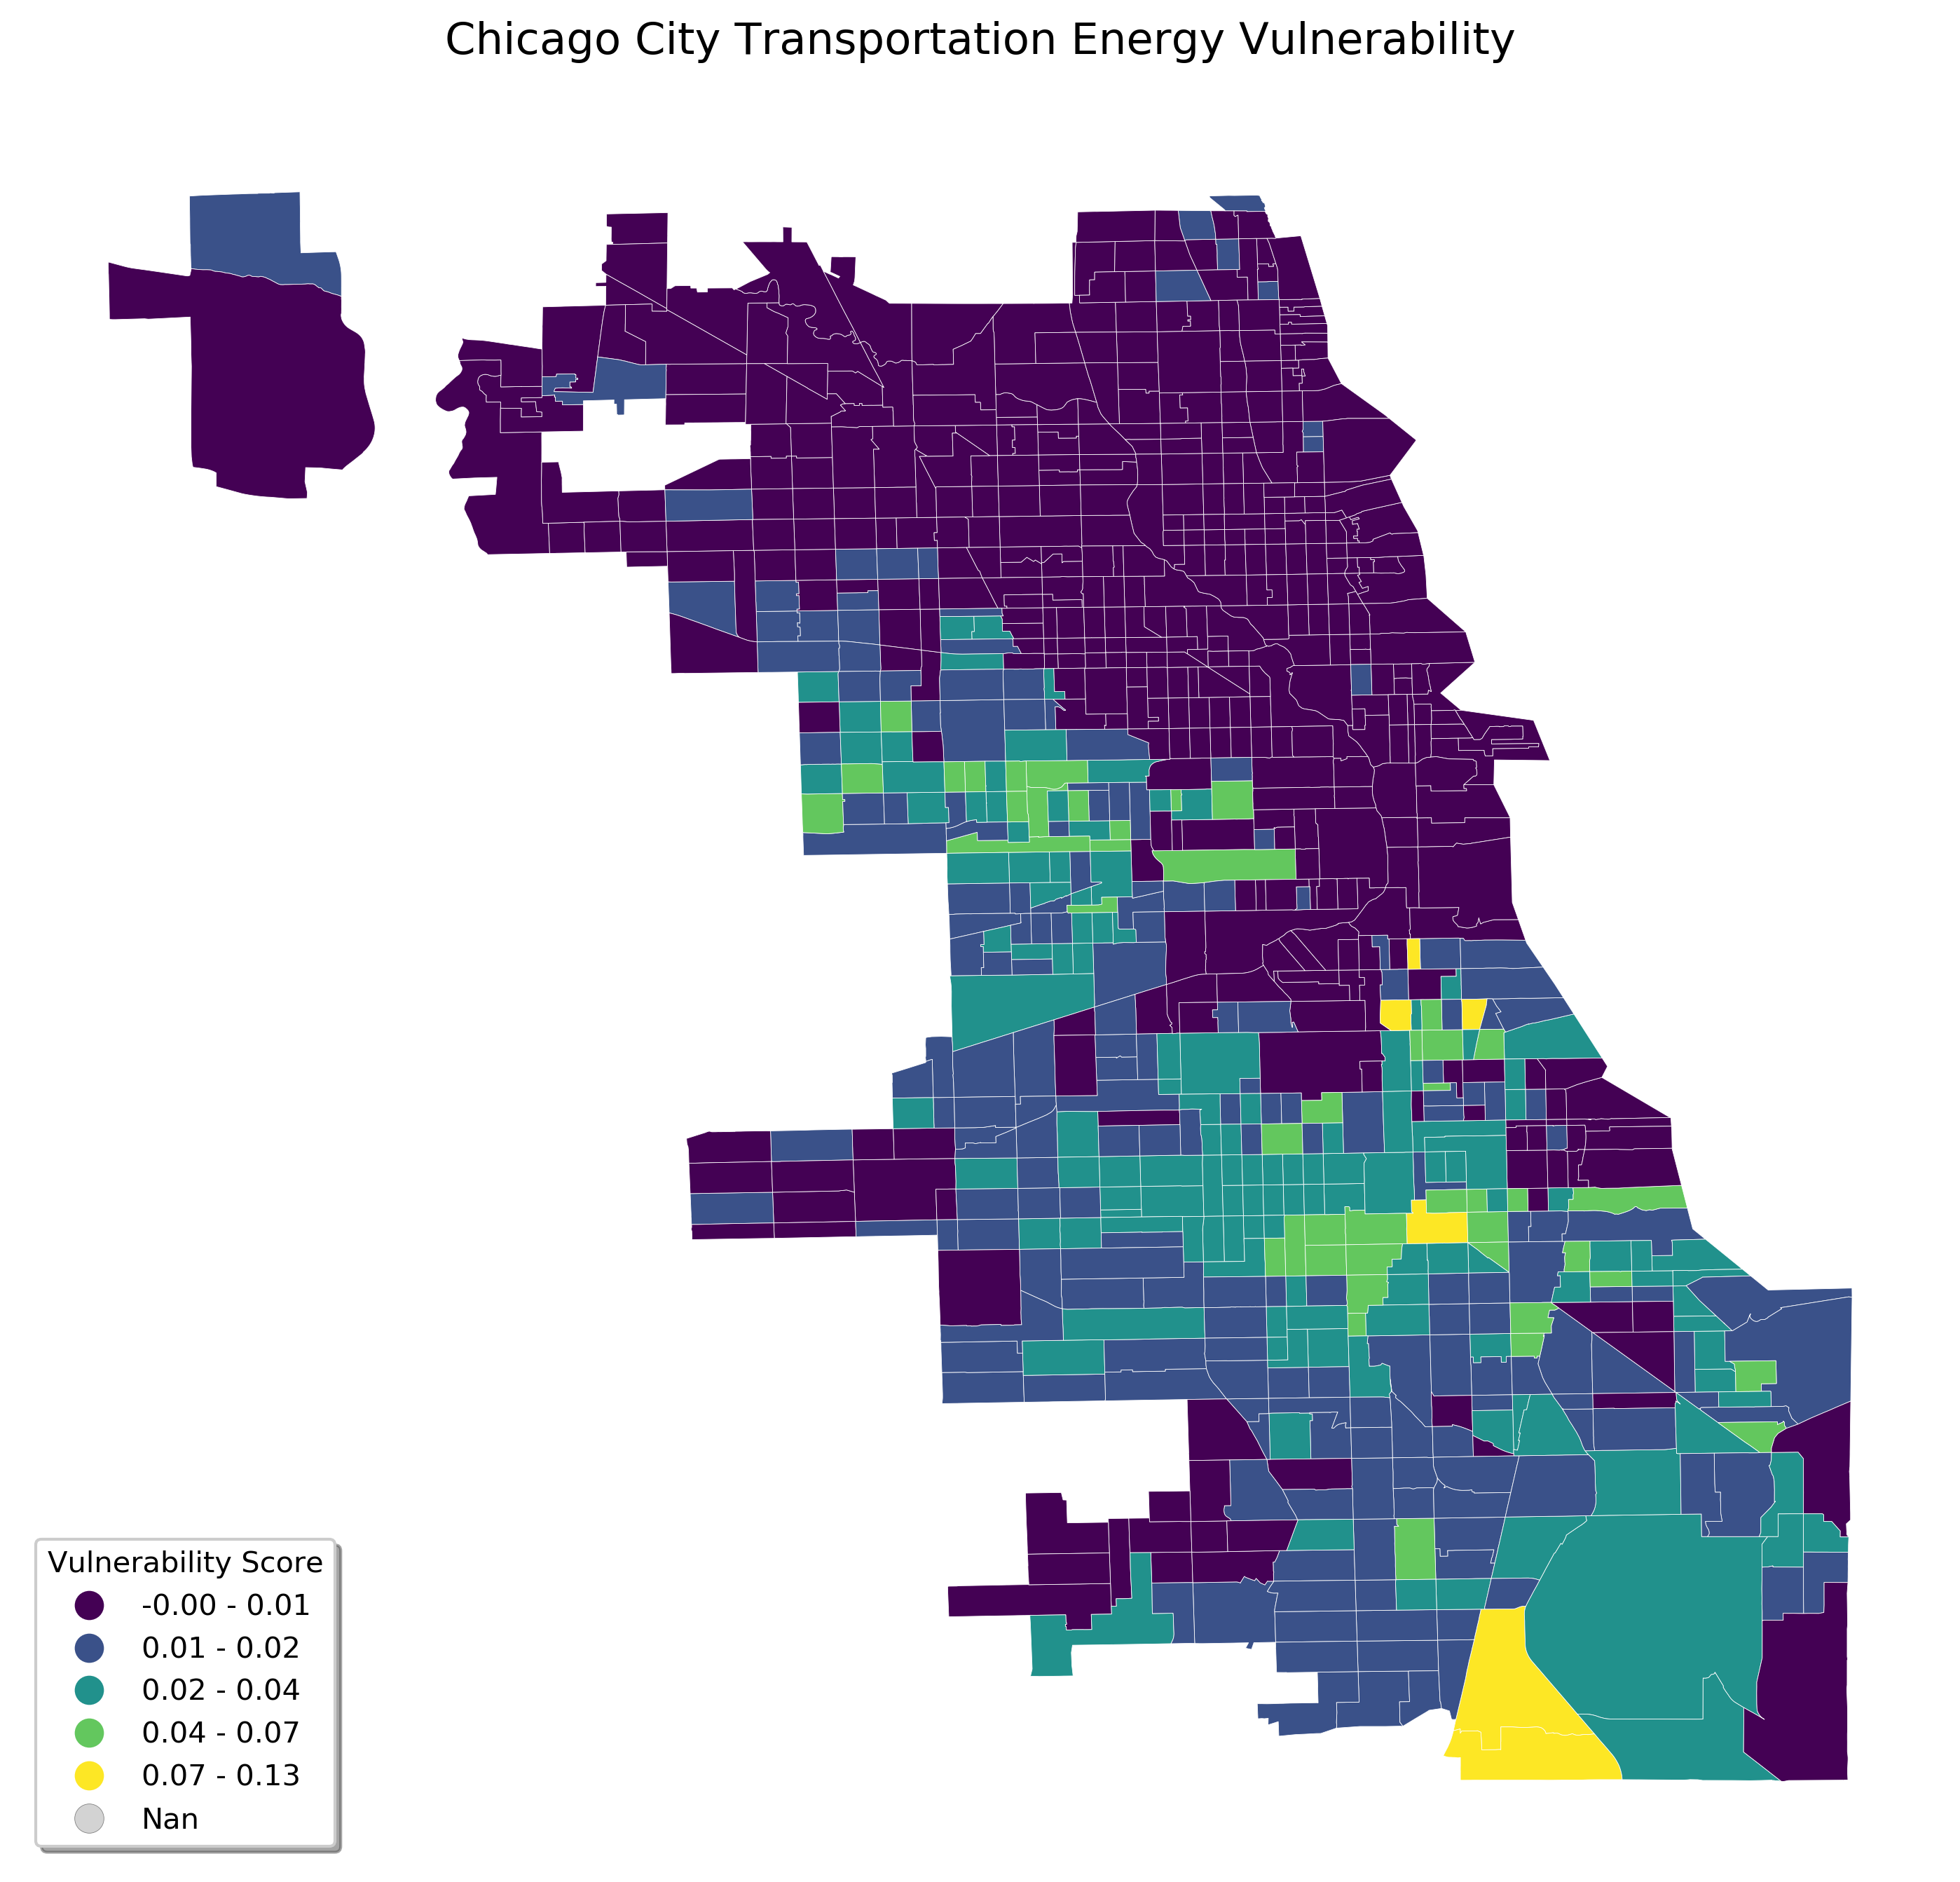

In [34]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

chi_vc.plot(
    column='vulnerablity_score_1',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': 'Vulnerability Score',
                 'shadow': True
                },
    missing_kwds={
                 "color": "lightgrey",
                 "edgecolor": "grey",
                 "hatch": "////",
                 "label": "Nan"
                 },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2
)

ax.axis('off')
ax.set_title('Chicago City Transportation Energy Vulnerability', fontsize=15,pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('Chicago_vulnerability_map.png', facecolor='w', dpi=500)

In [27]:
bus_stop = gpd.read_file("Bus stops/CTA_BusStops.shp")
bus_stop.head()

OBJECTID  SYSTEMSTOP       STREET     CROSS_ST DIR POS     ROUTESSTPG  \
0        83      2818.0  95TH STREET       FOREST  EB  NS  N5,95,111,115   
1        84     10956.0  75TH STREET       PAXTON  EB  NS          N5,75   
2        85      9234.0      BELMONT        OKETO  EB  NS             77   
3        86      7989.0    OAKENWALD  43RD STREET  NB  FS             43   
4        87      9981.0       KEDZIE  96TH STREET  NB  MT            52A   

  OWLROUTES            CITY  STATUS               PUBLIC_NAM    POINT_X  \
0        N5         CHICAGO       1     95th Street & Forest -87.616664   
1        N5         CHICAGO       1     75th Street & Paxton -87.571334   
2      None         CHICAGO       1          Belmont & Oketo -87.811736   
3      None         CHICAGO       1  Oakenwald & 43rd Street -87.597477   
4      None  EVERGREEN PARK       1     Kedzie & 96th Street -87.701669   

     POINT_Y                    geometry  
0  41.721747  POINT (-87.61666 41.72175)  
1  41.758861  POINT (-87.57133 41.75886)  
2  41.937928  POINT (-87.81174 41.93793)  
3  41.816976  POINT (-87.59748 41.81698)  
4  41.718910  POINT (-87.70167 41.71891)

In [38]:
pop = pd.read_csv("ACSDP5Y2019.DP05_data_with_overlays_2021-05-17T053431.csv")
pop = pop[['GEO_ID','DP05_0001E']]
pop.head()

GEO_ID  DP05_0001E
0  1400000US17031010100        4599
1  1400000US17031010201        7455
2  1400000US17031010202        2896
3  1400000US17031010300        6485
4  1400000US17031010400        5213

In [43]:
pop['geoid'] = pop.apply(lambda x: str(x['GEO_ID'])[9:],axis=1)
pop.head()

GEO_ID  DP05_0001E        geoid
0  1400000US17031010100        4599  17031010100
1  1400000US17031010201        7455  17031010201
2  1400000US17031010202        2896  17031010202
3  1400000US17031010300        6485  17031010300
4  1400000US17031010400        5213  17031010400

In [45]:
pop = pd.merge(pop, chicago,left_on='geoid',right_on='geoid10',how="right")

In [49]:
pop = gpd.GeoDataFrame(pop,crs=4326)

In [51]:
pop.head()

GEO_ID  DP05_0001E        geoid commarea  commarea_n  \
0  1400000US17031010100        4599  17031010100        1         1.0   
1  1400000US17031010201        7455  17031010201        1         1.0   
2  1400000US17031010202        2896  17031010202        1         1.0   
3  1400000US17031010300        6485  17031010300        1         1.0   
4  1400000US17031010400        5213  17031010400        1         1.0   

  countyfp10      geoid10  name10           namelsad10 notes statefp10  \
0        031  17031010100     101     Census Tract 101  None        17   
1        031  17031010201  102.01  Census Tract 102.01  None        17   
2        031  17031010202  102.02  Census Tract 102.02  None        17   
3        031  17031010300     103     Census Tract 103  None        17   
4        031  17031010400     104     Census Tract 104  None        17   

  tractce10                                           geometry  
0    010100  POLYGON ((-87.66368 42.01940, -87.66384 42.019...  
1    010201  POLYGON ((-87.68010 42.01254, -87.68027 42.012...  
2    010202  POLYGON ((-87.67336 42.01937, -87.67311 42.019...  
3    010300  POLYGON ((-87.66506 42.01280, -87.66543 42.012...  
4    010400  POLYGON ((-87.65080 41.99849, -87.65500 41.998...

In [50]:
pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
bus_stop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
chicago.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
bus_routes.crs

<Projected CRS: EPSG:3435>
Name: NAD83 / Illinois East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Illinois - SPCS - E
- bounds: (-89.28, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [31]:
bus_routes = gpd.read_file("Bus Routes/CTA_BusRoutes.shp")
bus_routes.head()

OBJECTID ROUTE                      NAME  WKDAY  SAT  SUN     SHAPE_LEN  \
0      7728    87               87TH STREET      1    1    1  67264.912668   
1      8001   134  STOCKTON/LASALLE EXPRESS      1    0    0  53849.181639   
2      8002     6      JACKSON PARK EXPRESS      1    1    1  97804.566914   
3      7725    70                  DIVISION      1    1    1  43105.567011   
4      7726   85A             NORTH CENTRAL      1    1    0  29850.417364   

                                            geometry  
0  MULTILINESTRING ((1145876.252 1846109.136, 114...  
1  MULTILINESTRING ((1174373.753 1898950.139, 117...  
2  MULTILINESTRING ((1187958.440 1863543.297, 118...  
3  MULTILINESTRING ((1136301.434 1907378.596, 113...  
4  MULTILINESTRING ((1139361.074 1932298.246, 113...

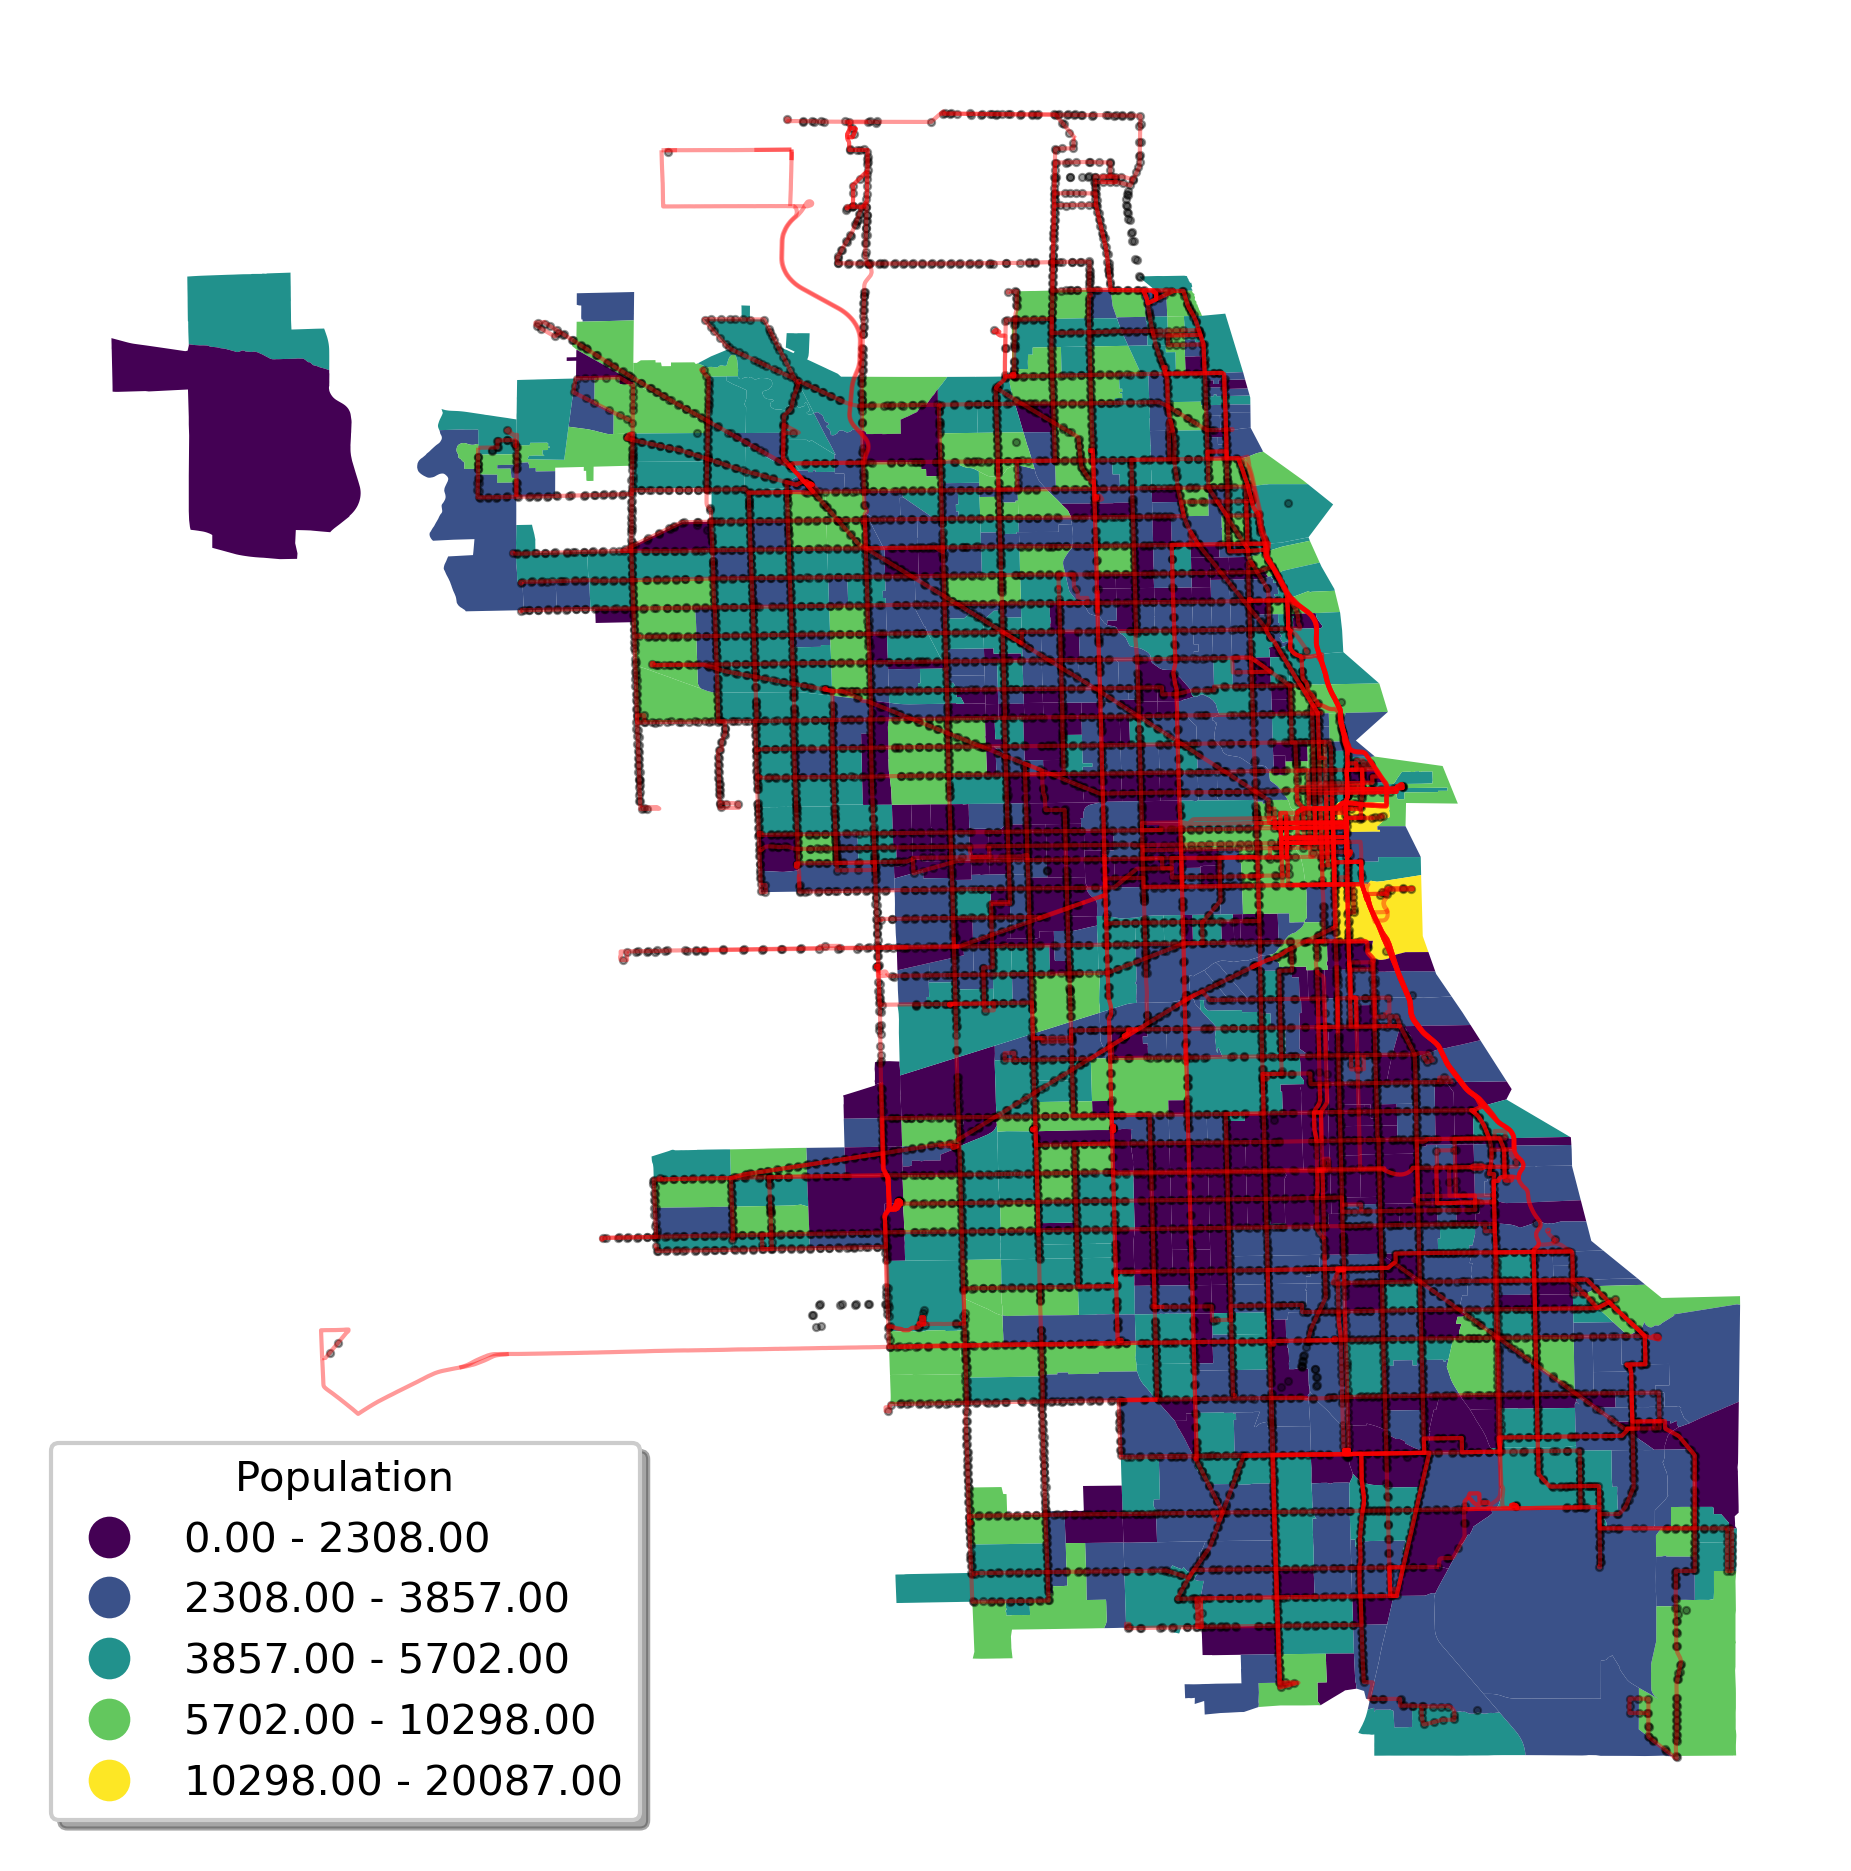

In [66]:
fig, ax = plt.subplots(figsize=(12, 8),dpi=300)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

pop.plot(
    column='DP05_0001E',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': 'Population',
                 'shadow': True
                },
#     missing_kwds={
#                 "color": "lightgrey",
#                 "edgecolor": "grey",
#                 "hatch": "////",
#                 "label": "Nan"
#                 },
    edgecolor=np.array([0., 0., 0., 0.]),
    linewidth=1
)

# ax = chicago.plot(ax=ax,
#                   facecolor='grey',
#                   edgecolor='white',
#                   linestyle='--',
# #                   hatch='xxxx',
#                   alpha=0.8)

ax = bus_routes.geometry.to_crs(epsg=4326).plot(ax=ax,
                                                edgecolor='red',
                                                linewidth=1,
                                                alpha=0.4,
                                                label='Bus Routes')

ax = bus_stop.plot(ax=ax,
                   facecolor='black',
                   edgecolor='black',
                   markersize=3,
                   linewidth=0.5,
                   alpha=0.4,
                   label='Bus Stops')
# ax.legend(loc='lower left', ncol=1, shadow=True)
ax.axis('off') # 移除坐标轴
fig.savefig('transit_pop.png', dpi=300)

# Champaign

In [2]:
basemap = gpd.read_file('Base Map/cb_2018_17_tract_500k.shp')
basemap.head()

STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID   NAME LSAD  \
0      17      031  843800  1400000US17031843800  17031843800   8438   CT   
1      17      037  001002  1400000US17037001002  17037001002  10.02   CT   
2      17      031  243000  1400000US17031243000  17031243000   2430   CT   
3      17      031  250600  1400000US17031250600  17031250600   2506   CT   
4      17      031  251700  1400000US17031251700  17031251700   2517   CT   

     ALAND  AWATER                                           geometry  
0  1309516       0  POLYGON ((-87.64554 41.80886, -87.64068 41.808...  
1  3477252   16983  POLYGON ((-88.79317 41.93313, -88.79257 41.933...  
2   324548       0  POLYGON ((-87.68195 41.89583, -87.67950 41.895...  
3   647765       0  POLYGON ((-87.77560 41.90925, -87.77536 41.909...  
4   486655       0  POLYGON ((-87.74826 41.89498, -87.74645 41.895...

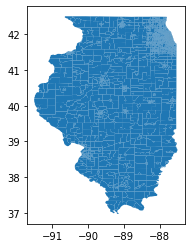

In [4]:
basemap.plot()

In [32]:
champaign_tracts = pd.read_csv('ACSDP5Y2019.DP05_data_with_overlays_2021-05-06T232055.csv',dtype={'GEO_ID':str})

In [34]:
champaign_tracts = champaign_tracts[['GEO_ID','NAME']]

In [35]:
champaign_tracts_map = pd.merge(champaign_tracts,basemap,left_on='GEO_ID',right_on='AFFGEOID',how='left')
champaign_tracts_map.head()

GEO_ID                                         NAME_x  \
0  1400000US17019000200     Census Tract 2, Champaign County, Illinois   
1  1400000US17019000301  Census Tract 3.01, Champaign County, Illinois   
2  1400000US17019000302  Census Tract 3.02, Champaign County, Illinois   
3  1400000US17019000401  Census Tract 4.01, Champaign County, Illinois   
4  1400000US17019000402  Census Tract 4.02, Champaign County, Illinois   

  STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID NAME_y LSAD  \
0      17      019  000200  1400000US17019000200  17019000200      2   CT   
1      17      019  000301  1400000US17019000301  17019000301   3.01   CT   
2      17      019  000302  1400000US17019000302  17019000302   3.02   CT   
3      17      019  000401  1400000US17019000401  17019000401   4.01   CT   
4      17      019  000402  1400000US17019000402  17019000402   4.02   CT   

     ALAND  AWATER                                           geometry  
0  1254619       0  POLYGON ((-88.23834 40.12165, -88.23746 40.123...  
1   456544     634  POLYGON ((-88.24177 40.11261, -88.23540 40.112...  
2   432022       0  POLYGON ((-88.24149 40.11373, -88.24052 40.116...  
3   254569       0  POLYGON ((-88.23537 40.10903, -88.23352 40.109...  
4   323642       0  POLYGON ((-88.24273 40.10679, -88.24238 40.108...

In [38]:
c_exposure_map.head()

GEOID         fuel  Price  exposure   min-max                GEO_ID  \
0  17019000301   507.361030  2.085  0.149014  0.341223  1400000US17019000301   
1  17019000700   509.128126  2.085  0.026489  0.050416  1400000US17019000700   
2  17019001203  1013.525478  2.085  0.027464  0.052730  1400000US17019001203   
3  17019005800   493.488319  2.085  0.020638  0.036529  1400000US17019005800   
4  17019011100   538.630764  2.085  0.049384  0.104756  1400000US17019011100   

                                           NAME_x STATEFP COUNTYFP TRACTCE  \
0   Census Tract 3.01, Champaign County, Illinois      17      019  000301   
1      Census Tract 7, Champaign County, Illinois      17      019  000700   
2  Census Tract 12.03, Champaign County, Illinois      17      019  001203   
3     Census Tract 58, Champaign County, Illinois      17      019  005800   
4    Census Tract 111, Champaign County, Illinois      17      019  011100   

               AFFGEOID NAME_y LSAD    ALAND  AWATER  \
0  1400000US17019000301   3.01   CT   456544     634   
1  1400000US17019000700      7   CT  2574577      65   
2  1400000US17019001203  12.03   CT  2531548   56136   
3  1400000US17019005800     58   CT  1437376    1529   
4  1400000US17019011100    111   CT  1078548    6653   

                                            geometry  
0  POLYGON ((-88.24177 40.11261, -88.23540 40.112...  
1  POLYGON ((-88.25797 40.13507, -88.25414 40.134...  
2  POLYGON ((-88.29524 40.09846, -88.28796 40.098...  
3  POLYGON ((-88.21775 40.11280, -88.21609 40.112...  
4  POLYGON ((-88.22890 40.11637, -88.22073 40.116...

In [8]:
IL_exposure_map = pd.merge(exposure,basemap,on='GEOID',how='right')

In [9]:
IL_exposure_map.head()

GEOID         fuel  Price  exposure   min-max STATEFP COUNTYFP  \
0  17031843800   575.482498  2.085  0.033291  0.066560      17      031   
1  17037001002   596.887249  2.085  0.056259  0.121074      17      037   
2  17031243000   579.181741  2.085  0.014147  0.021122      17      031   
3  17031250600  1063.759938  2.085  0.048024  0.101528      17      031   
4  17031251700   530.227777  2.085  0.020915  0.037187      17      031   

  TRACTCE              AFFGEOID   NAME LSAD    ALAND  AWATER  \
0  843800  1400000US17031843800   8438   CT  1309516       0   
1  001002  1400000US17037001002  10.02   CT  3477252   16983   
2  243000  1400000US17031243000   2430   CT   324548       0   
3  250600  1400000US17031250600   2506   CT   647765       0   
4  251700  1400000US17031251700   2517   CT   486655       0   

                                            geometry  
0  POLYGON ((-87.64554 41.80886, -87.64068 41.808...  
1  POLYGON ((-88.79317 41.93313, -88.79257 41.933...  
2  POLYGON ((-87.68195 41.89583, -87.67950 41.895...  
3  POLYGON ((-87.77560 41.90925, -87.77536 41.909...  
4  POLYGON ((-87.74826 41.89498, -87.74645 41.895...

In [19]:
IL_min = IL_exposure_map['exposure'].min()
IL_max = IL_exposure_map['exposure'].max()

IL_exposure_map['IL_min_max'] = IL_exposure_map.apply(lambda x: (x['exposure']-IL_min)/(IL_max-IL_min), axis=1)

In [20]:
IL_exposure_map.describe()

fuel         Price     exposure      min-max         ALAND  \
count  3121.000000  3.121000e+03  3107.000000  3107.000000  3.121000e+03   
mean    936.841649  2.085000e+00     0.033597     0.067286  4.606875e+07   
std     278.334056  4.441604e-16     0.015918     0.037782  1.142414e+08   
min     469.395755  2.085000e+00     0.005482     0.000556  2.209400e+04   
25%     579.181741  2.085000e+00     0.023098     0.042367  1.079253e+06   
50%    1095.836826  2.085000e+00     0.031984     0.063457  3.017030e+06   
75%    1167.938596  2.085000e+00     0.042101     0.087469  1.257511e+07   
max    1570.290228  2.085000e+00     0.302970     0.706632  7.755974e+08   

             AWATER   IL_min_max  
count  3.121000e+03  3107.000000  
mean   7.045732e+05     0.094509  
std    3.121161e+06     0.053509  
min    0.000000e+00     0.000000  
25%    0.000000e+00     0.059216  
50%    2.132000e+03     0.089085  
75%    1.891150e+05     0.123094  
max    7.245145e+07     1.000000

In [11]:
IL_exposure_map = gpd.GeoDataFrame(IL_exposure_map,crs = 4326)

In [12]:
IL_exposure_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

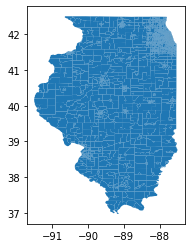

In [13]:
IL_exposure_map.plot()

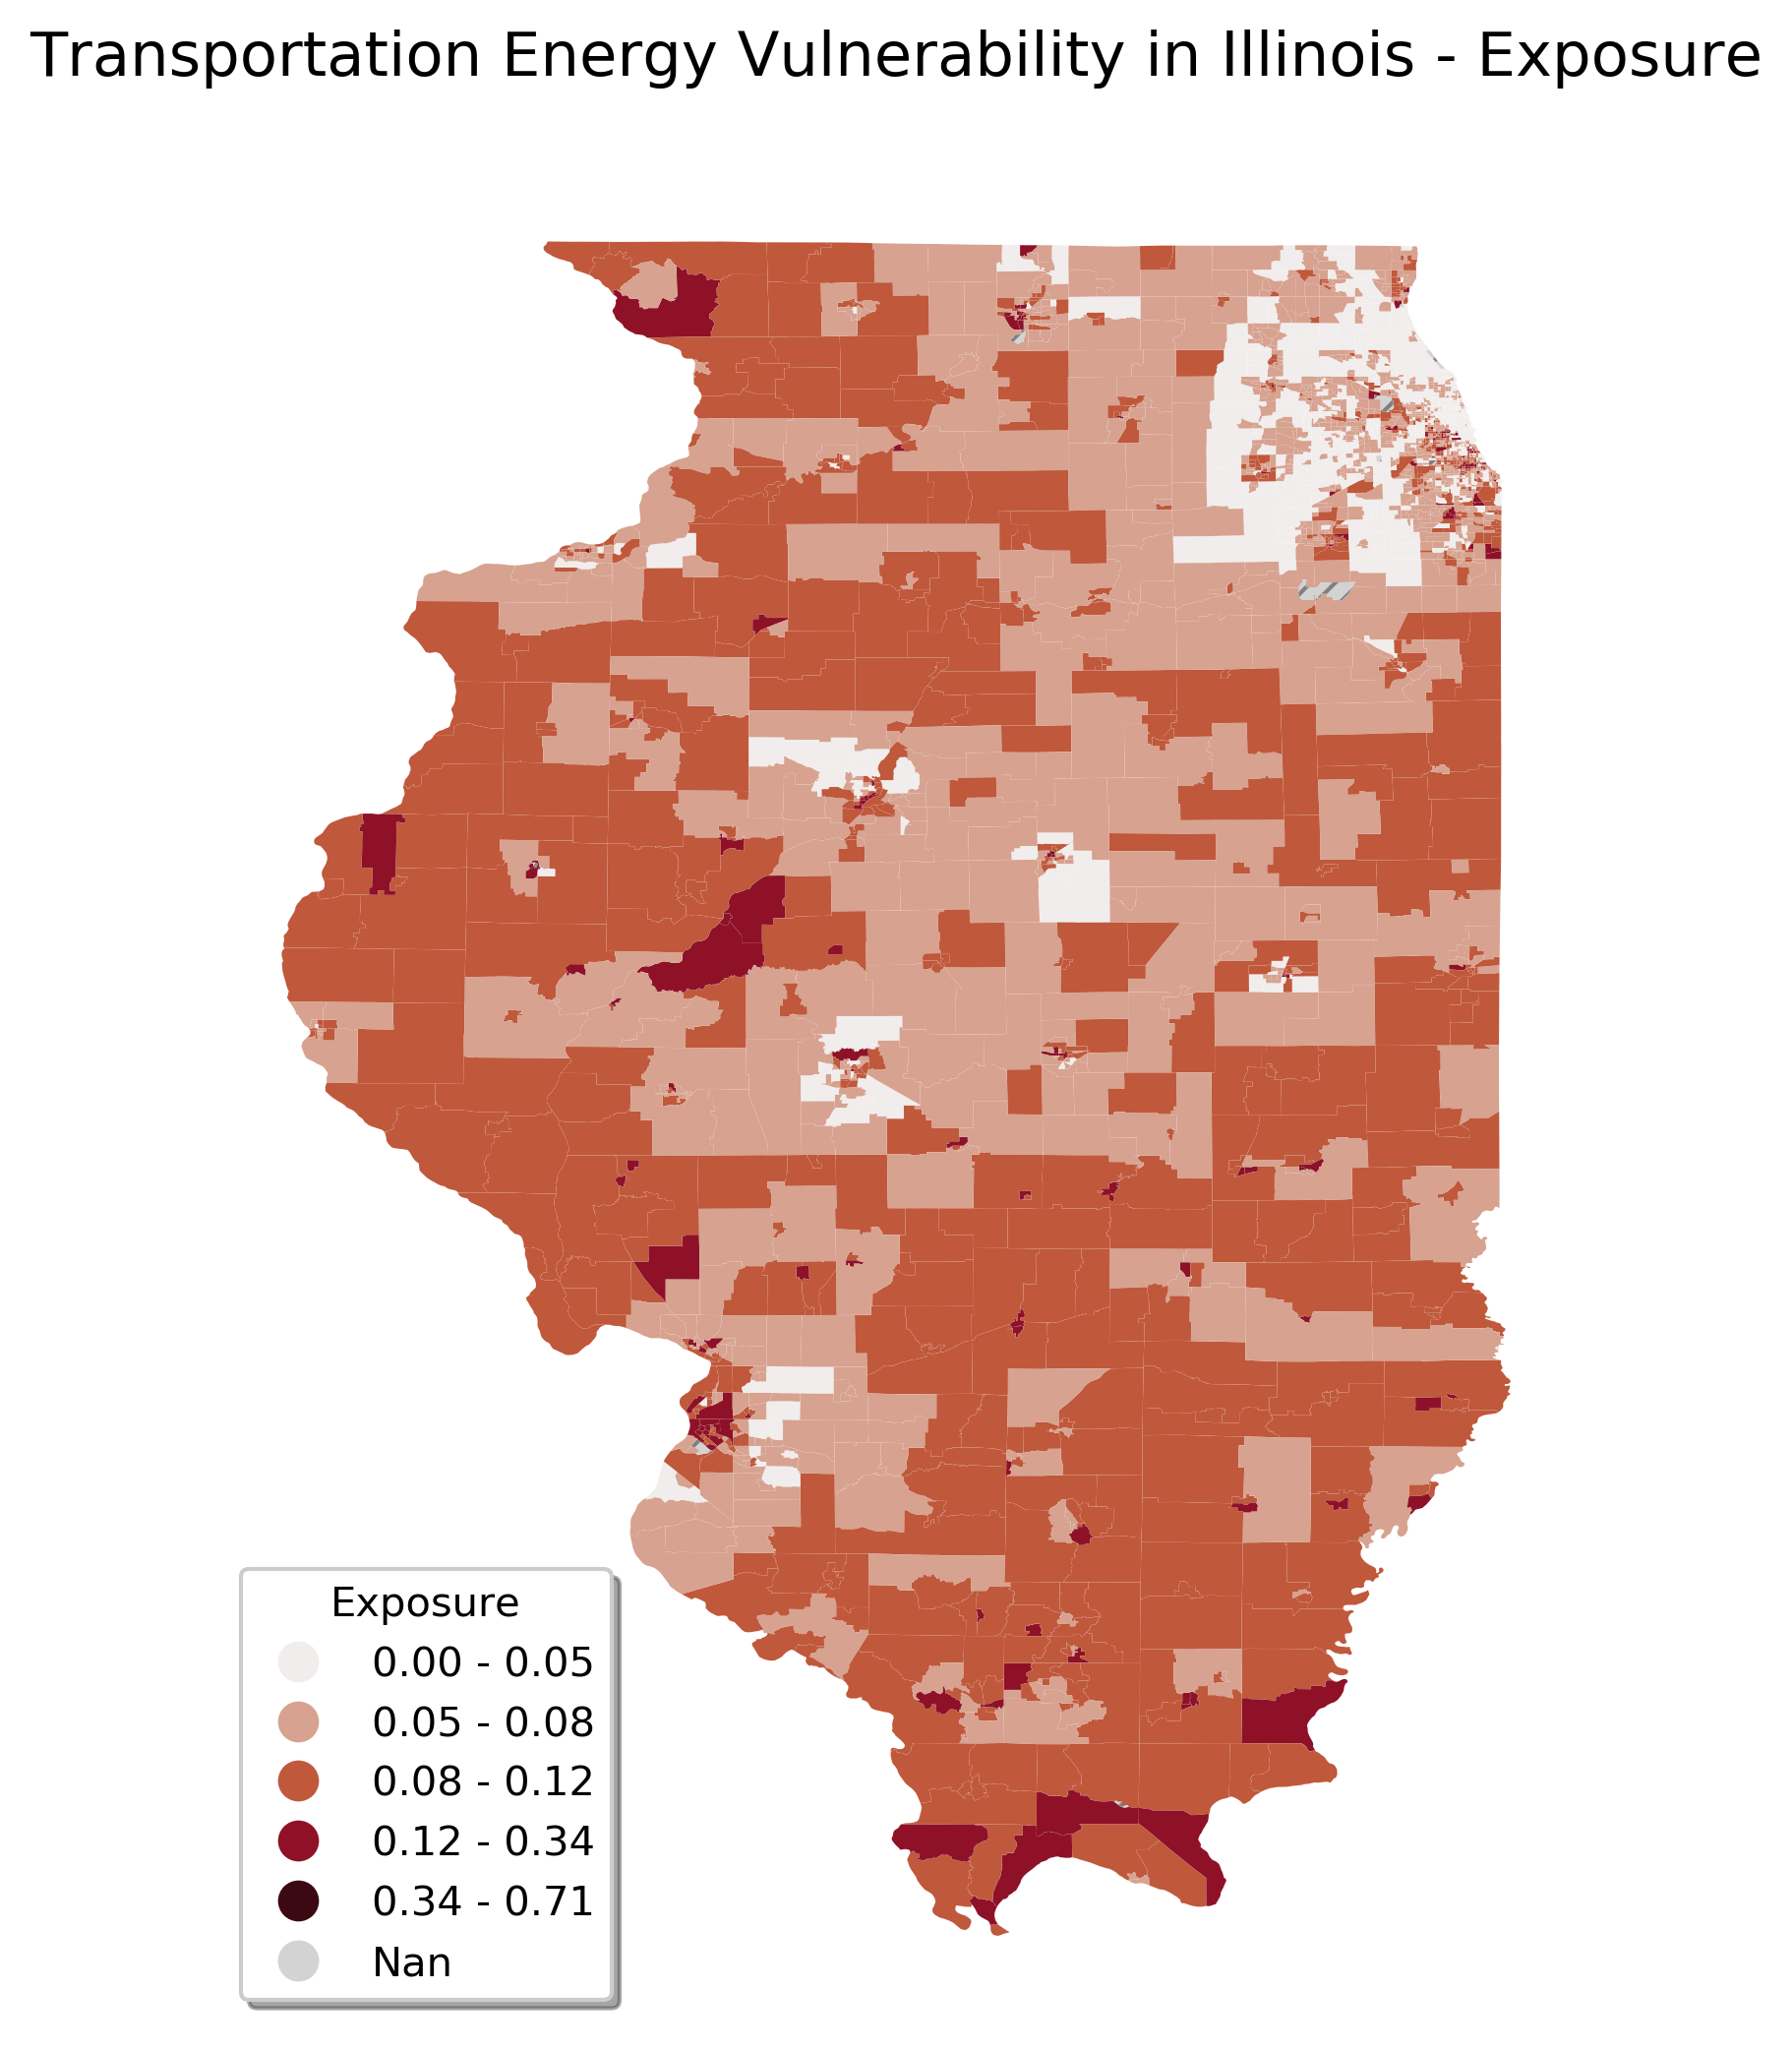

In [29]:
import numpy as np

fig, ax = plt.subplots(figsize=(8, 8),dpi=300)

# from palettable.scientific.sequential import Viridis_7

# cmap = Viridis_7.mpl_colormap
from palettable.cmocean.sequential import Amp_20
cmap = Amp_20.mpl_colormap

IL_exposure_map.plot(
    column='min-max',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': 'Exposure',
                 'shadow': True
                },
    missing_kwds={
                "color": "lightgrey",
                "edgecolor": "grey",
                "hatch": "////",
                "label": "Nan"
                },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.01
)

ax.axis('off')
ax.set_title('Transportation Energy Vulnerability in Illinois - Exposure', fontsize=15,pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('IL_exposure_map.png', facecolor='w', dpi=500)